**Lab 1 : Unsupervised Learning**

This laboratory explores three fundamental unsupervised learning techniques applied to two distinct datasets:

Two datasets:
- Temper.npz: Monthly temperature data for 15 French cities (15×12 features)
- Digits.npz: Handwritten digit images (1, 7, 8) of 28×28 pixels (3000×784 features)

Mehtods learned : 

1. Clustering:
   - K-Means clustering with optimal K selection using elbow method and silhouette scores
   - Gaussian Mixture Models (GMM) for probabilistic clustering

2. Density Estimation : 
   - GMM for probability density estimation
   - Outlier detection and synthetic data generation

3. Dimensionality Reduction :
   - Principal Component Analysis (PCA) for linear projection and data compression
   - t-SNE for non-linear manifold learning and visualization

The objective is to understand how these methods extract meaningful patterns from raw data, enable effective visualization, and reveal hidden structures relevant to climate analysis and digit recognition tasks.

In [2]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

**1.3 : Loading the data**

**Question 1**


In [6]:
df_temper = np.load("/Users/alexisbezacier/Desktop/M2DS/Remy/01_unsupervised_learning/temper.npz") #Loading the temperature data.
df_digits = np.load("/Users/alexisbezacier/Desktop/M2DS/Remy/01_unsupervised_learning/digits.npz") #Loading the data associated with the digits.
x2 = df_digits["x"]/255
y2 = df_digits["xt"]/255
y = df_digits["y"]
x = df_digits["yt"]

In [7]:
data = df_temper["data"]
villes = df_temper["villes"]
varname = df_temper["varname"]

In [135]:
# Variables
x1 = data[:,:12] # temper data (15×12)
coords = data[:,12:] # latitude/longitude
print(coords) # We display the coordinates of the 15 cities from the dataset, namely the 13th and 14th columns.

[[44.5  -0.34]
 [48.2  -4.29]
 [45.5   3.05]
 [45.1   5.43]
 [50.4   3.04]
 [45.5   4.51]
 [43.2   5.24]
 [43.4   3.53]
 [47.1  -1.33]
 [43.4   7.15]
 [48.5   2.2 ]
 [48.1  -1.41]
 [48.4   7.45]
 [43.4   1.26]
 [46.1   3.26]]


**Question 2**

(15, 12)
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]]
['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
[[44.5  -0.34]
 [48.2  -4.29]
 [45.5   3.05]]
[ 3.97333333  4.83333333  8.23333333 10.98       14.43333333 17.83333333
 19.83333333 19.56666667 16.98666667 12.32        7.92666667  4.84666667]


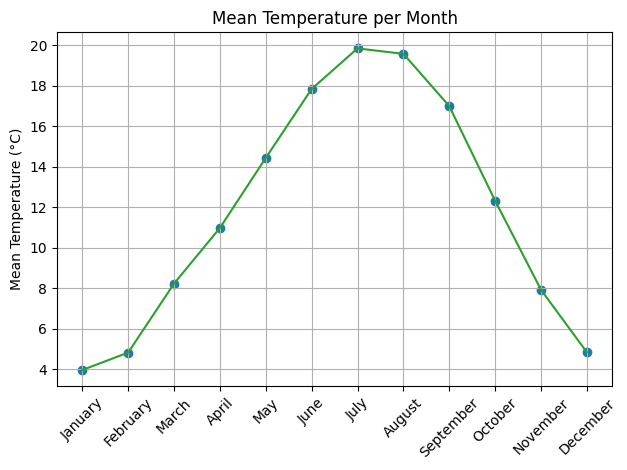

In [136]:
# Observation of the data from the temper dataset:

print(x1.shape)
print(x1[:3,:])    # the few first line
print(villes)      # Display all the cities
print(coords[:3])  # cordinates

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mean_values = x1.mean(axis=0)   # mean of all the temperature of the cities by month
print(mean_values)
plt.grid()
for i in range(len(months)):
    plt.plot(months[i], mean_values[i])
plt.plot(months, mean_values)
plt.scatter(months, mean_values)
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature per Month")

plt.xticks(rotation=45)   # rotation of the labels
plt.tight_layout()
plt.show()

Here, we can say that this dataset is consistent. In fact, the temperatures in winter and autumn are very low, while those in spring and summer are high, which matches what we would expect seasonally. This suggests that the data is reliable and the monthly trends are coherent.

(3000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1500, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(28, 28)


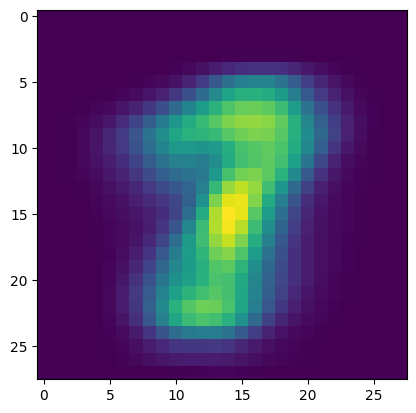

In [137]:
# Observation of the data of the dataset digits :

print(x2.shape)
print(x2[:3,:])
print(y2.shape)
print(y2[:3,:])
mean_imagex = x2.mean(axis=0).reshape(28,28)
mean_imagey = y2.mean(axis=0).reshape(28,28)
print(mean_imagex.shape)
plt.imshow(mean_imagex)

This image represents the average of all images in the dataset. We can roughly recognize digits like seven, one, and two. It highlights the common patterns and general shapes of the digits.

**Question 3**

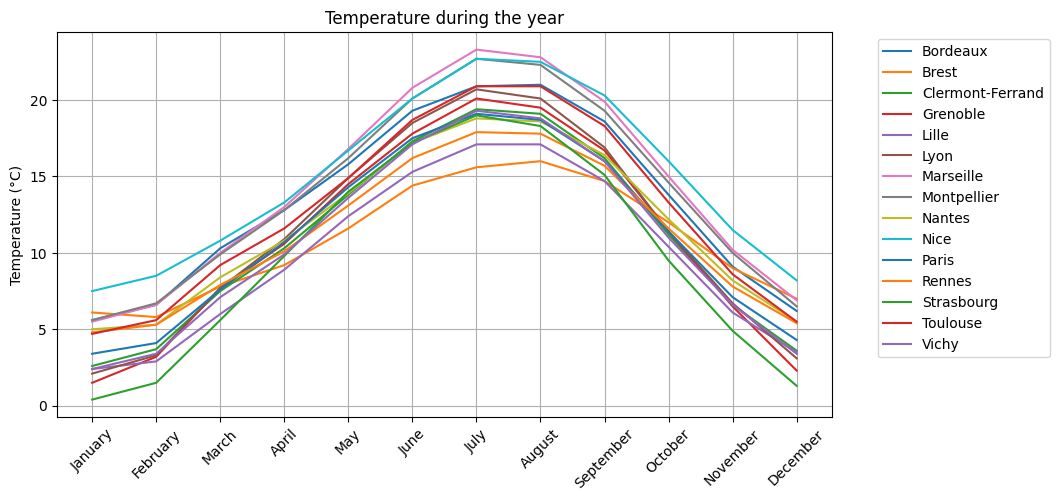

[-0.34 -4.29  3.05  5.43  3.04  4.51  5.24  3.53 -1.33  7.15  2.2  -1.41
  7.45  1.26  3.26]


In [138]:
# Question 3 (Bonus) :

plt.figure(figsize=(10,5))
for i in range(len(villes)):
    plt.plot(range(1,13), x1[i], label=villes[i])
plt.ylabel("Temperature (°C)")
plt.title("Temperature during the year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(range(1,13), months, rotation=45)
plt.show()

print(coords[:,1])


We can see that there is a common trend for the temperature in each city. However, the amplitude of temperature variations differs between cities, allowing us to group them based on how extreme their seasonal changes are.

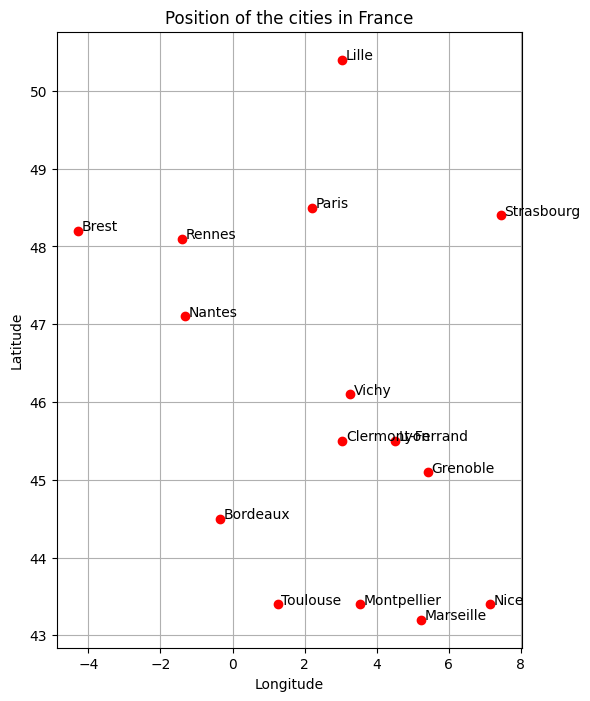

In [139]:
plt.figure(figsize=(6,8))
plt.scatter(coords[:,1], coords[:,0], c="red")
for i, ville in enumerate(villes):
    plt.text(coords[i,1]+0.1, coords[i,0], ville)
    plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Position of the cities in France")
plt.grid()
plt.show()


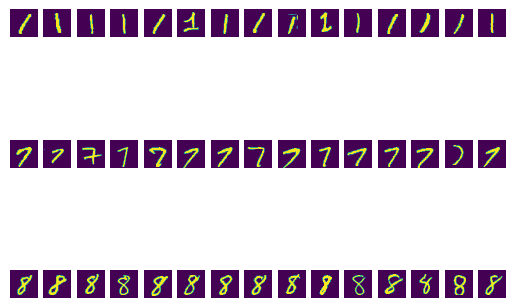

In [140]:
for i in range(15):
      plt.subplot(3, 15, i + 1)
      pl.imshow(x2[i].reshape(28,28))
      plt.axis('off')

for j in range(15):
    plt.subplot(3, 15, 15+j+1)
    plt.imshow(x2[1000+j].reshape(28,28))
    plt.axis("off")

for w in range(15):
    plt.subplot(3, 15, 30+w+1)
    plt.imshow(x2[2000+w].reshape(28,28))
    plt.axis("off")

plt.show()

**2 Clustering**

**Temper.npz**

**Question 1**

In [141]:
K = 3
kmeans = KMeans(K,random_state=2).fit(x1)
labels_temp = kmeans.labels_
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i} = {centroid}\n")

for ville, label in zip(villes, kmeans.labels_):
    print(ville,':', 'Cluster',label)


Centroid 1 = [ 5.78  6.8  10.04 12.7  16.08 19.8  22.1  21.9  19.28 14.54  9.88  6.66]

Centroid 2 = [ 5.3         5.46666667  8.03333333 10.03333333 12.86666667 15.93333333
 17.43333333 17.46666667 15.6        11.93333333  8.33333333  5.96666667]

Centroid 3 = [ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
 19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857]

Bordeaux : Cluster 0
Brest : Cluster 1
Clermont-Ferrand : Cluster 2
Grenoble : Cluster 2
Lille : Cluster 2
Lyon : Cluster 2
Marseille : Cluster 0
Montpellier : Cluster 0
Nantes : Cluster 1
Nice : Cluster 0
Paris : Cluster 2
Rennes : Cluster 1
Strasbourg : Cluster 2
Toulouse : Cluster 0
Vichy : Cluster 2


The centroids represent the average monthly temperatures of the cities in each cluster. We can observe a clear consistency in the clusters, especially in terms of geographical location. For instance, Centroid 1 corresponds to warmer cities in the south, Centroid 3 to colder cities in the north, and Centroid 2 to cities with moderate temperatures.

The clustering seems coherent, but testing a different number of clusters (K) could potentially improve the model. Additionally, visualizing the clusters on a map could help interpret the geographical patterns more clearly.

**Question 2**

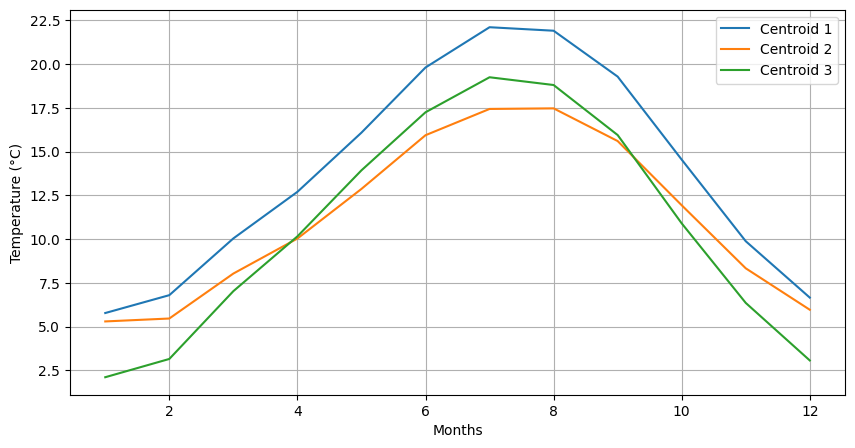

In [142]:
plt.figure(figsize=(10,5))
for i in range(len(centroids)):
    plt.plot(range(1,13), centroids[i], label=f"Centroid {i+1}")
plt.ylabel("Temperature (°C)")
plt.xlabel("Months")
plt.grid()
plt.legend()
plt.show()

The crossing of Centroid 2 and Centroid 3 shows overlapping temperature ranges in some months, which can complicate clustering. This overlap may be due to local factors such as cloud cover, coastal influence, altitude differences, or simply the averaging of monthly temperatures. Choosing a different number of clusters (K) could also help reduce this overlap.

The centroid 1 represents the warmer cities, the 2nd, the temperate one and the third, the cold one. 

**Question 3**

***Pour K = 4***


In [143]:
K = 4
kmeans = KMeans(K,random_state=2).fit(x1)
labels_temp = kmeans.labels_
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i} = {centroid}\n")

for ville, label in zip(villes, kmeans.labels_):
    print(ville,':', 'Cluster',label)

Centroid 1 = [ 6.05   7.1   10.25  12.975 16.375 20.075 22.4   22.15  19.525 14.85
 10.2    6.95 ]

Centroid 2 = [ 4.83333333  5.4         8.5        10.83333333 13.96666667 17.36666667
 19.2        19.1        16.8        12.36666667  8.2         5.46666667]

Centroid 3 = [ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
 19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857]

Centroid 4 = [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]

Bordeaux : Cluster 0
Brest : Cluster 3
Clermont-Ferrand : Cluster 2
Grenoble : Cluster 2
Lille : Cluster 2
Lyon : Cluster 2
Marseille : Cluster 0
Montpellier : Cluster 0
Nantes : Cluster 1
Nice : Cluster 0
Paris : Cluster 2
Rennes : Cluster 1
Strasbourg : Cluster 2
Toulouse : Cluster 1
Vichy : Cluster 2


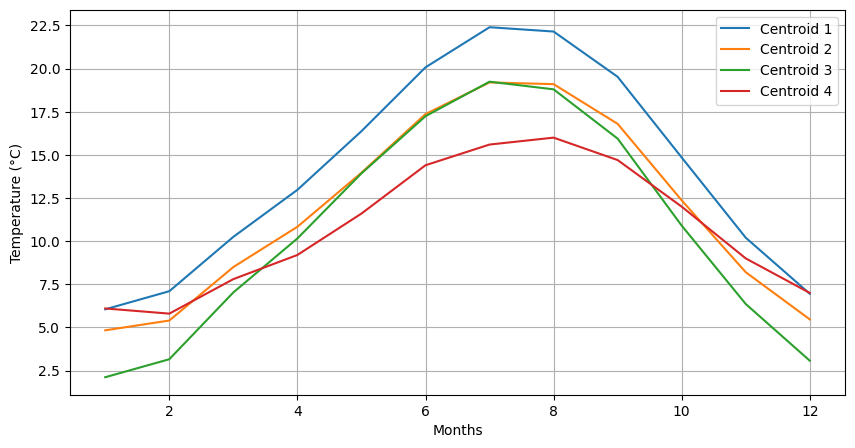

In [144]:
plt.figure(figsize=(10,5))
for i in range(len(centroids)):
    plt.plot(range(1,13), centroids[i], label=f"Centroid {i+1}")
plt.ylabel("Temperature (°C)")
plt.xlabel("Months")
plt.grid()
plt.legend()
plt.show()

Bad separation of the cluster, too much overlap from the centoid 2,3 and 4. The centroid 2 and 3 are too close to have two separate cluster. So it's a non-sense to add one centroid.

**For K=2**

In [145]:
K = 2
kmeans = KMeans(K,random_state=2).fit(x1)
labels_temp = kmeans.labels_
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid {i} = {centroid}\n")

for ville, label in zip(villes, kmeans.labels_):
    print(ville,':', 'Cluster',label)

Centroid 1 = [ 5.78  6.8  10.04 12.7  16.08 19.8  22.1  21.9  19.28 14.54  9.88  6.66]

Centroid 2 = [ 3.07  3.85  7.33 10.12 13.61 16.85 18.7  18.4  15.84 11.21  6.95  3.94]

Bordeaux : Cluster 0
Brest : Cluster 1
Clermont-Ferrand : Cluster 1
Grenoble : Cluster 1
Lille : Cluster 1
Lyon : Cluster 1
Marseille : Cluster 0
Montpellier : Cluster 0
Nantes : Cluster 1
Nice : Cluster 0
Paris : Cluster 1
Rennes : Cluster 1
Strasbourg : Cluster 1
Toulouse : Cluster 0
Vichy : Cluster 1


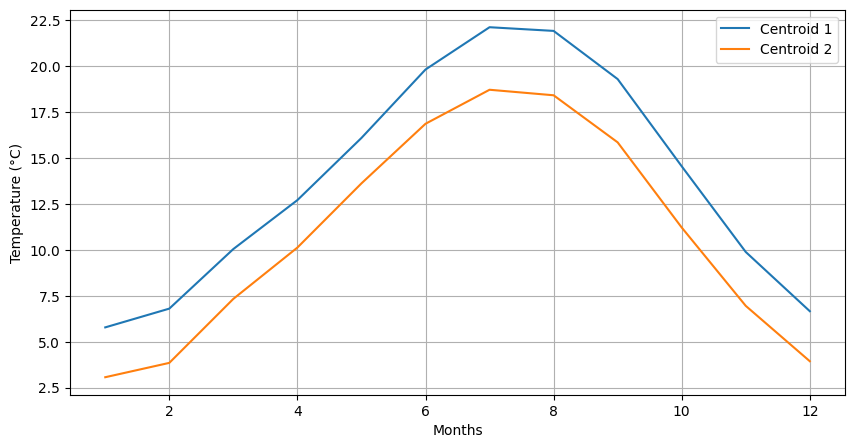

In [146]:
plt.figure(figsize=(10,5))
for i in range(len(centroids)):
    plt.plot(range(1,13), centroids[i], label=f"Centroid {i+1}")
plt.ylabel("Temperature (°C)")
plt.xlabel("Months")
plt.grid()
plt.legend()
plt.show()

Good separation which is show by the silhouette score. But there is a big gap between the two centroids. That means that we could add one more centroids to make the best classification

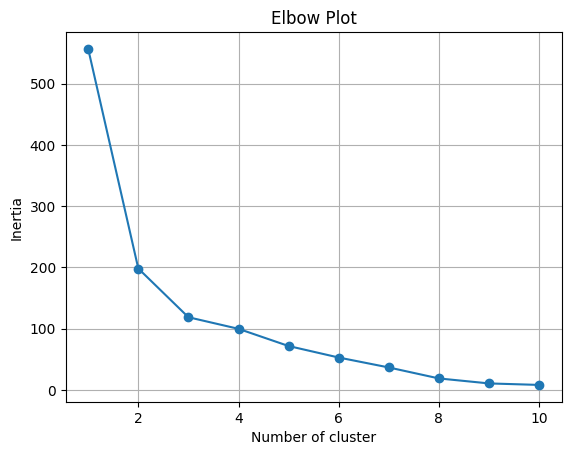

In [147]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.grid()
plt.show()

We can assume by looking at this graph that the good value of K is 3.

The inertia mesasure the proximity of the points of the points of a same cluster from a centroïd. More the inertia is small, more the points are near the centroids of their cluster.



A second clue that can assure us that K=3 is the best number of cluster for this datset can be the silhouette score.

In [148]:
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=2)
  kmeans.fit(x1)
  labels_temp = kmeans.labels_
  score = silhouette_score(x1, labels_temp)
  print("Silhouette score pour k =",k , score)

Silhouette score pour k = 2 0.5377405725883406
Silhouette score pour k = 3 0.4521388875031068
Silhouette score pour k = 4 0.32998415175687373
Silhouette score pour k = 5 0.33070274102231406
Silhouette score pour k = 6 0.3071128830290512
Silhouette score pour k = 7 0.29789184784647815
Silhouette score pour k = 8 0.3484442715904289
Silhouette score pour k = 9 0.3378736280869193
Silhouette score pour k = 10 0.2717091310467286


The silhouette score indicates that the best K is 2, which makes sense because it measures the best separation between clusters and tends to favor smaller K. However, considering the context, we know that there are roughly three types of climate in France: cold, temperate, and hot. Therefore, even if the silhouette score suggests K=2, it is more meaningful to choose K=3, as indicated by the elbow plot

**Digits.npz**

**Question 1**

In [149]:
K_digits = 3
kmeans_digits = KMeans(n_clusters=K_digits, random_state=2).fit(x2)
labels_digits = kmeans_digits.labels_
centroids_digits = kmeans_digits.cluster_centers_

print(labels_digits)

[2 2 2 ... 1 1 1]


**Question 2**

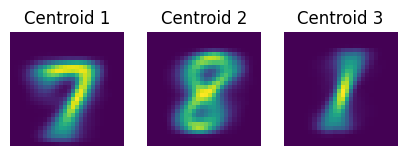

In [150]:
plt.figure(figsize=(5, 3))
for i in range(K_digits):
    centroid_image = centroids_digits[i].reshape(28, 28)
    plt.subplot(1, K_digits, i + 1)
    plt.imshow(centroid_image)
    plt.title(f'Centroid {i+1}')
    plt.axis('off')
plt.show()

These images do not correspond to actual digits from the dataset. Each image is the average of all images assigned to the corresponding cluster, showing the general shape of the digit for that cluster.

The samples are grouped by calculating the average pixel values for each group. Similar images are placed in the same group.

The digit samples are clustered based on their visual appearance, not the actual digit class they represent. The K-Means clustering algorithm groups images that look visually similar based on their pixel values.



**Question 3**

In [151]:
K_digits = 4
kmeans_digits = KMeans(n_clusters=K_digits, random_state=2).fit(x2)
labels_digits = kmeans_digits.labels_
centroids_digits = kmeans_digits.cluster_centers_

print(labels_digits)


[1 2 2 ... 3 3 3]


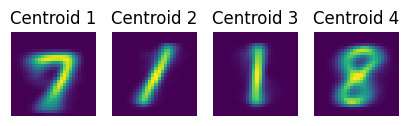

In [152]:
plt.figure(figsize=(5, 3))
for i in range(K_digits):
    centroid_image = centroids_digits[i].reshape(28, 28)
    plt.subplot(1, K_digits, i + 1)
    plt.imshow(centroid_image)
    plt.title(f'Centroid {i+1}')
    plt.axis('off')
plt.show()

The centroids look good but, the second and the third one are similar modulo the angle of the image. It could mean that K is too high.

In [153]:
K_digits = 2
kmeans_digits = KMeans(n_clusters=K_digits, random_state=2).fit(x2)
labels_digits = kmeans_digits.labels_
centroids_digits = kmeans_digits.cluster_centers_

print(labels_digits)

[1 1 1 ... 1 0 0]


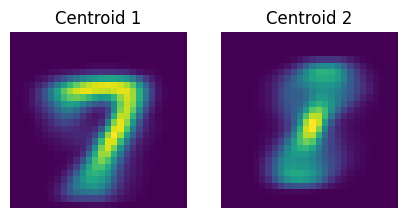

In [154]:
plt.figure(figsize=(5, 3))
for i in range(K_digits):
    centroid_image = centroids_digits[i].reshape(28, 28)
    plt.subplot(1, K_digits, i + 1)
    plt.imshow(centroid_image)
    plt.title(f'Centroid {i+1}')
    plt.axis('off')
plt.show()

The mean images are blurry, especially the second one. That may means that it correspond to the mean of a lot off diffrerents images of differents digits. So K is to low.

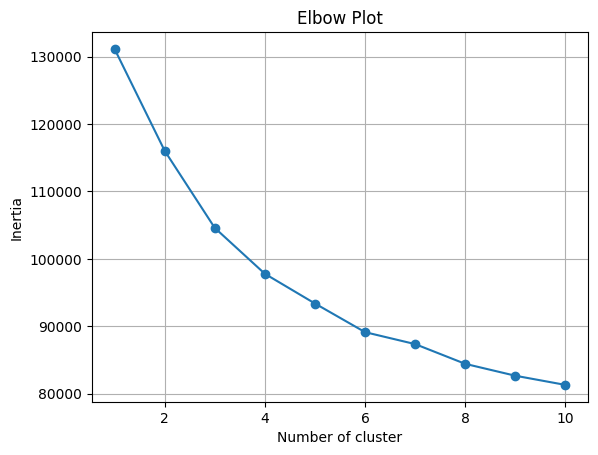

In [155]:
inertia=[]

for k in range(1,11):
  kmeans_digits = KMeans(n_clusters=k, random_state=2)
  kmeans_digits.fit(x2)
  inertia.append(kmeans_digits.inertia_)


plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.grid()
plt.show()



It is a bit subjective, but for me the best K based on the elbow method is 3 or 4, we'll implement the silhouette method to be sure about that

In [156]:
for k in range(2,11):
  kmeans_digits = KMeans(n_clusters=k, random_state=2)
  kmeans_digits.fit(x2)
  labels_digits = kmeans_digits.labels_
  score = silhouette_score(x2, labels_digits)
  print("Silhouette score for k =",k , score)

Silhouette score for k = 2 0.13457235996331143
Silhouette score for k = 3 0.13976218761265227
Silhouette score for k = 4 0.10950792748321511
Silhouette score for k = 5 0.11428560289237849
Silhouette score for k = 6 0.12343928926215661
Silhouette score for k = 7 0.12416401487333988
Silhouette score for k = 8 0.10227449756881236
Silhouette score for k = 9 0.10295996610642019
Silhouette score for k = 10 0.10527093874796932


According to this method, the best K is 3. And even without this methods, it was sure that it was 3 because of the numbers of label in the dataset.

**2.2**

**2.2.1**

The results make sens because the cities which are in the same cluster are not geographically near (south, center, north) and with our knowledge in climate, we could easily say that the clustering makes sens. In facts, the clusters are :     

1.   Bordeaux, Toulouse, Montpellier, Marseille, Nice
2.   Brest, Nantes, Rennes
3.   Clermont-ferrand, Grenoble, Lyon, Lille, Paris, Strasbourg, Vichy







**2.2.2**

In [157]:
K = 3
kmeans = KMeans(K,random_state=2).fit(x1)
labels_temp = kmeans.labels_
centroids = kmeans.cluster_centers_

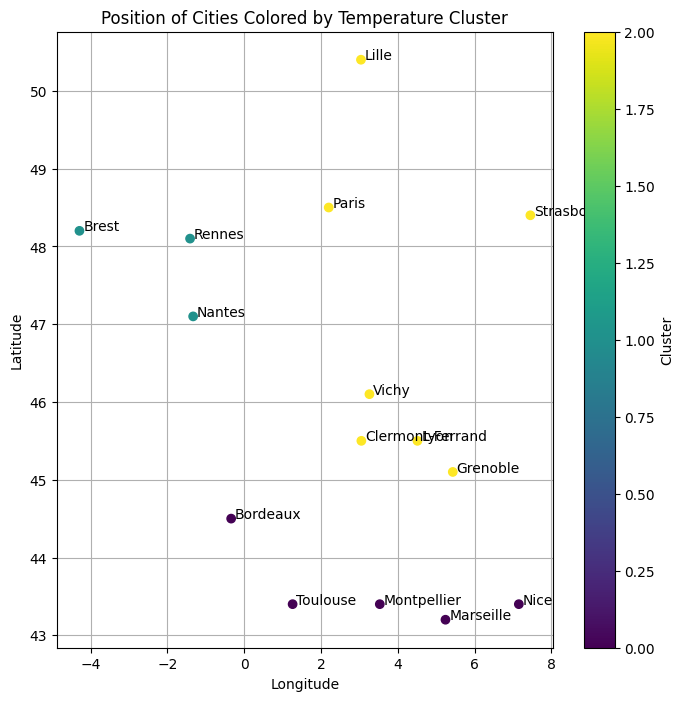

In [158]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(coords[:, 1], coords[:, 0], c=labels_temp, cmap='viridis')

for i, ville in enumerate(villes):
    plt.text(coords[i, 1] + 0.1, coords[i, 0], ville)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Position of Cities Colored by Temperature Cluster")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

Looking at the plot, cities in the same temperature cluster are not always geographically close (Paris and Grenoble for example). This suggests that clustering based solely on annual temperature profiles does not perfectly capture geographical proximity. Other factors besides latitude and longitude influence temperature, leading to geographically distant cities having similar temperature patterns.


**2.3 Digits dataset**

**2.3.1**

**Does the clusters resemble a true image from the dataset?**

Yes, the cluster centroids generally resemble true images from the dataset because the centroid is the average of the images in a cluster.

**Could you tell if a cluster centroid is a true image? Why?**

No, a cluster centroid is not necessarily a true image from the dataset. The centroid is a calculated value (the average of the pixel values). Unless by chance the average of the images in a cluster happens to be exactly the same as one of the original images, the centroid will be an "average" image.

**2.3.2**

In [159]:
K_digits = 3
kmeans_digits = KMeans(n_clusters=K_digits, random_state=2).fit(x2)
labels_digits = kmeans_digits.labels_
centroids_digits = kmeans_digits.cluster_centers_



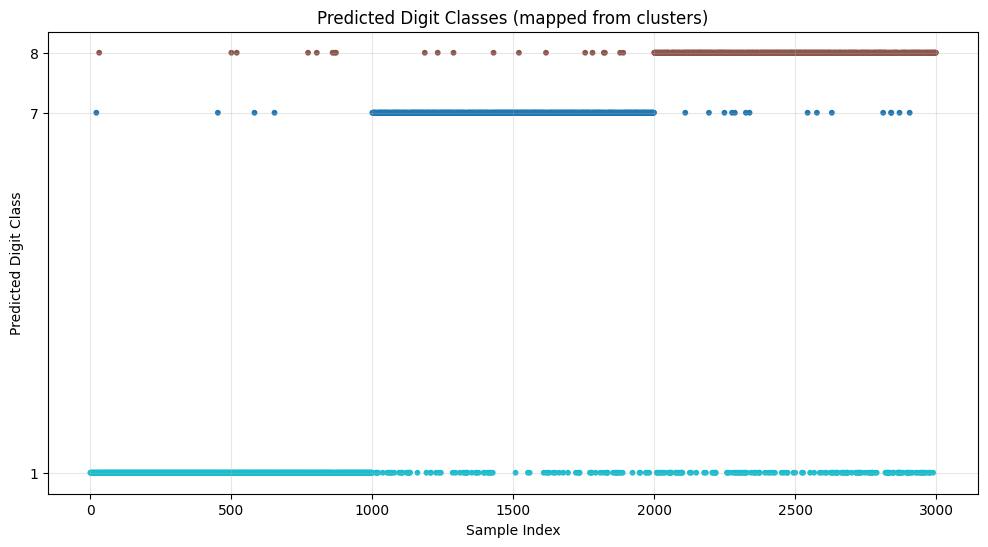

In [160]:
cluster_to_class = {}
for cluster in np.unique(labels_digits):
    mask = labels_digits == cluster
    most_common = mode(y[mask], keepdims=True).mode[0]
    cluster_to_class[cluster] = most_common


mapped_labels = np.array([cluster_to_class[label] for label in labels_digits])


plt.figure(figsize=(12,6))
plt.scatter(range(len(y)), mapped_labels, c=labels_digits, cmap='tab10', s=10)
plt.xlabel("Sample Index")
plt.ylabel("Predicted Digit Class")
plt.title("Predicted Digit Classes (mapped from clusters)")
plt.yticks([1, 7, 8])
plt.grid(True, alpha=0.3)
plt.show()


The predicted cluster labels (0, 1, 2) are plotted as a signal. Since the samples are sorted by true class (7, 8, 1), a perfect clustering would show constant labels within each block of samples. We can see that some blocks are mostly constant, indicating that the clustering captures part of the class structure, but there are also label switches within certain digits, showing that the clustering is not perfect.

We can notice that most misclassifications are toward the digit "1".

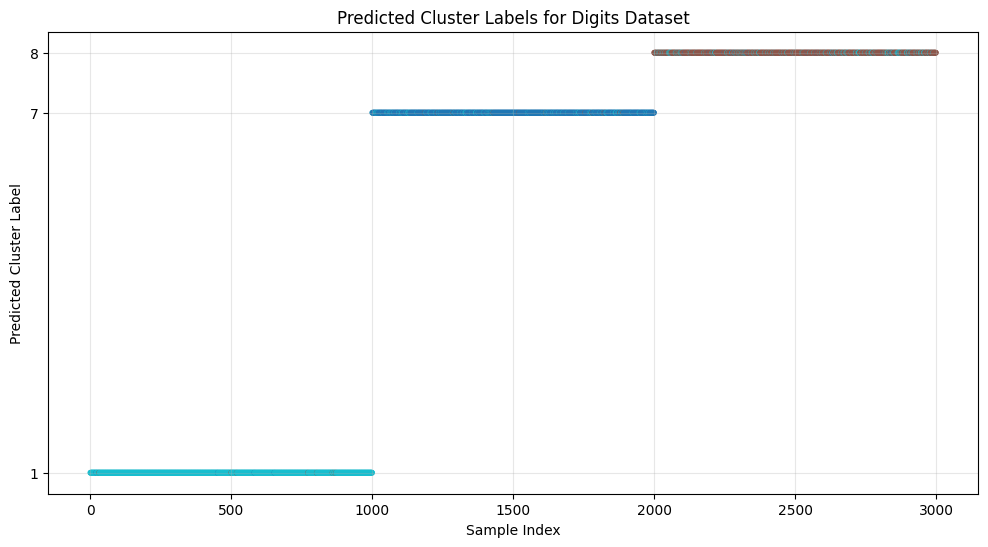

In [161]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y)), y, c=labels_digits, cmap='tab10', s=10)
plt.xlabel("Sample Index")
plt.ylabel("Predicted Cluster Label")
plt.title("Predicted Cluster Labels for Digits Dataset")
plt.yticks(np.unique(y))
plt.grid(True, alpha=0.3)
plt.show()

This is how would be a perfect clustering with K-means. Every prediction correspond to the real prediction.

In [162]:
rs = rand_score(y.ravel(), labels_digits)
print("Rand Score:", rs)

ars = adjusted_rand_score(y.ravel(), labels_digits)
print("Adjusted Rand Score:", ars)

Rand Score: 0.8864214738246082
Adjusted Rand Score: 0.7459136296811465


The Rand Score is 0.886 and the Adjusted Rand Score is 0.746. This shows that K-Means clustering does a good job at grouping the digits according to their true classes, even though it is an unsupervised method.

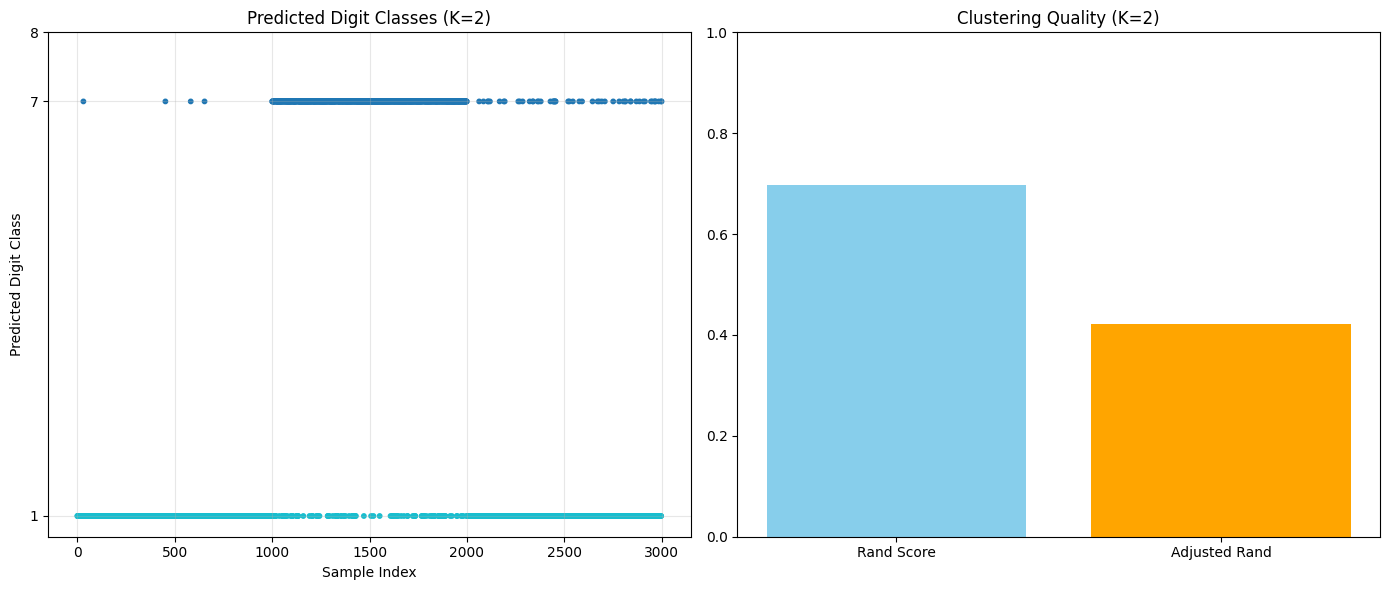

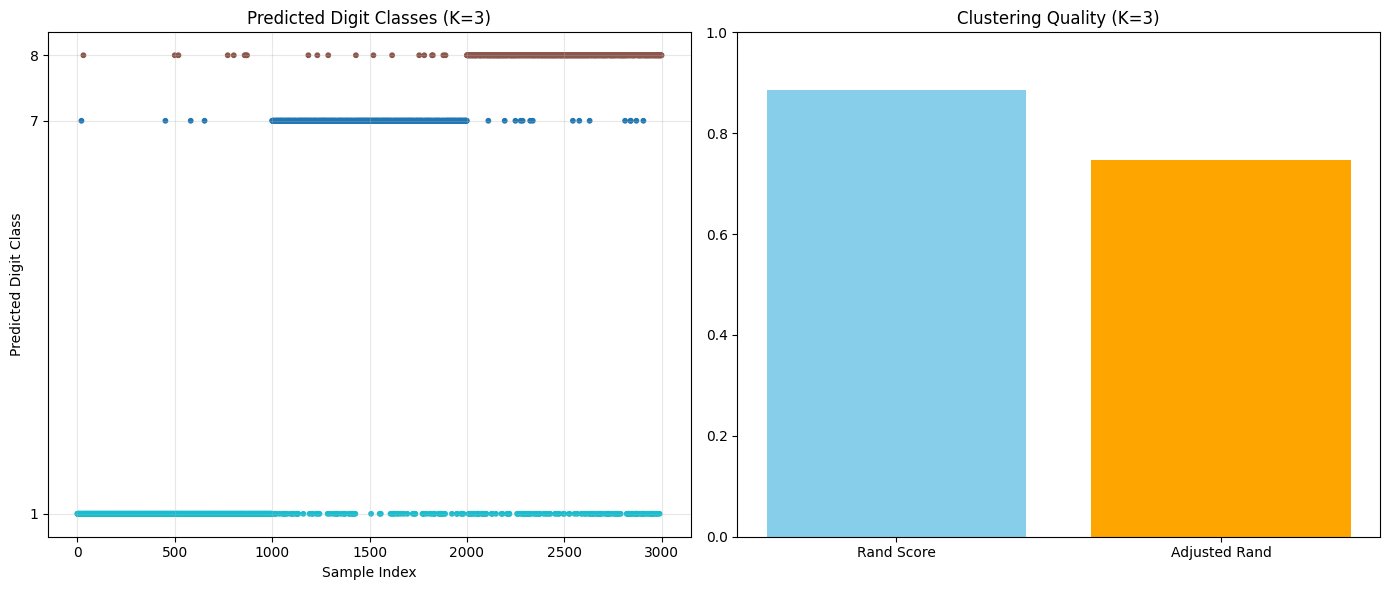

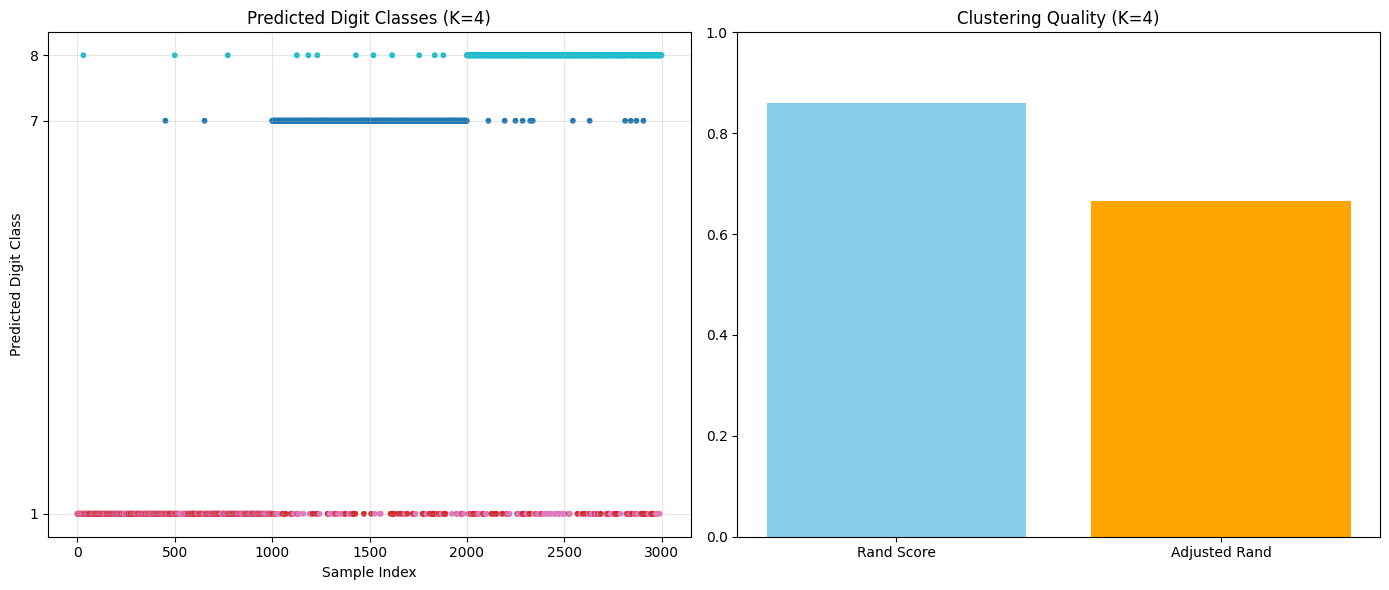

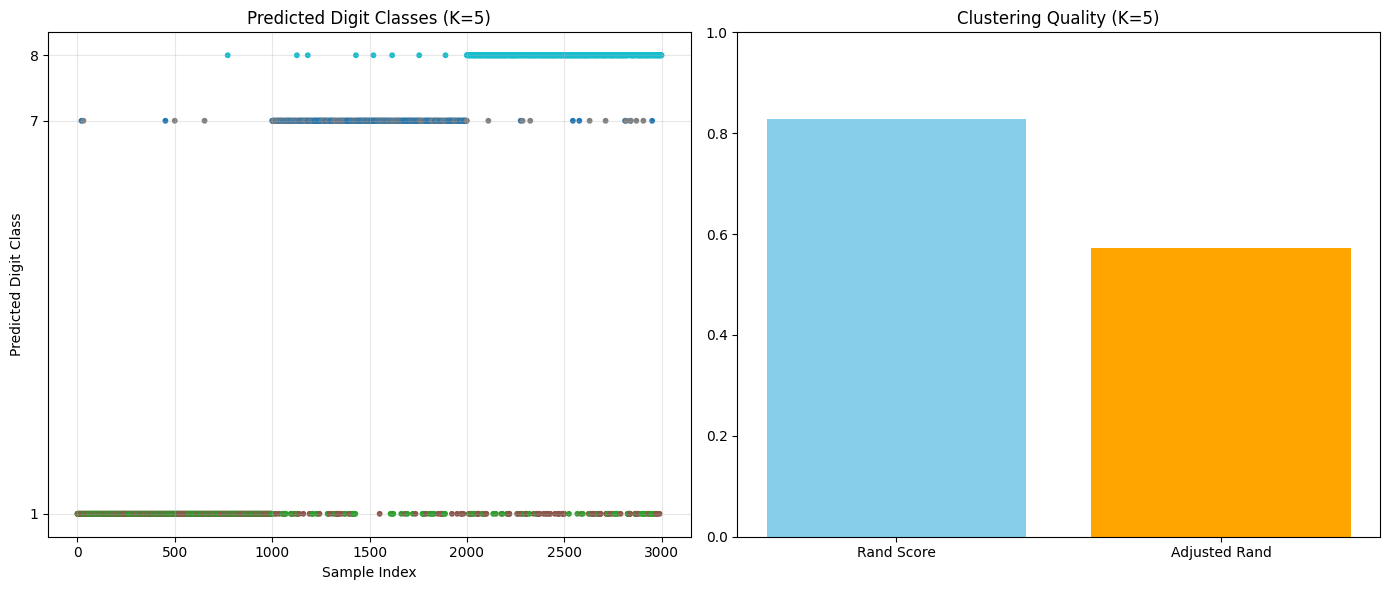

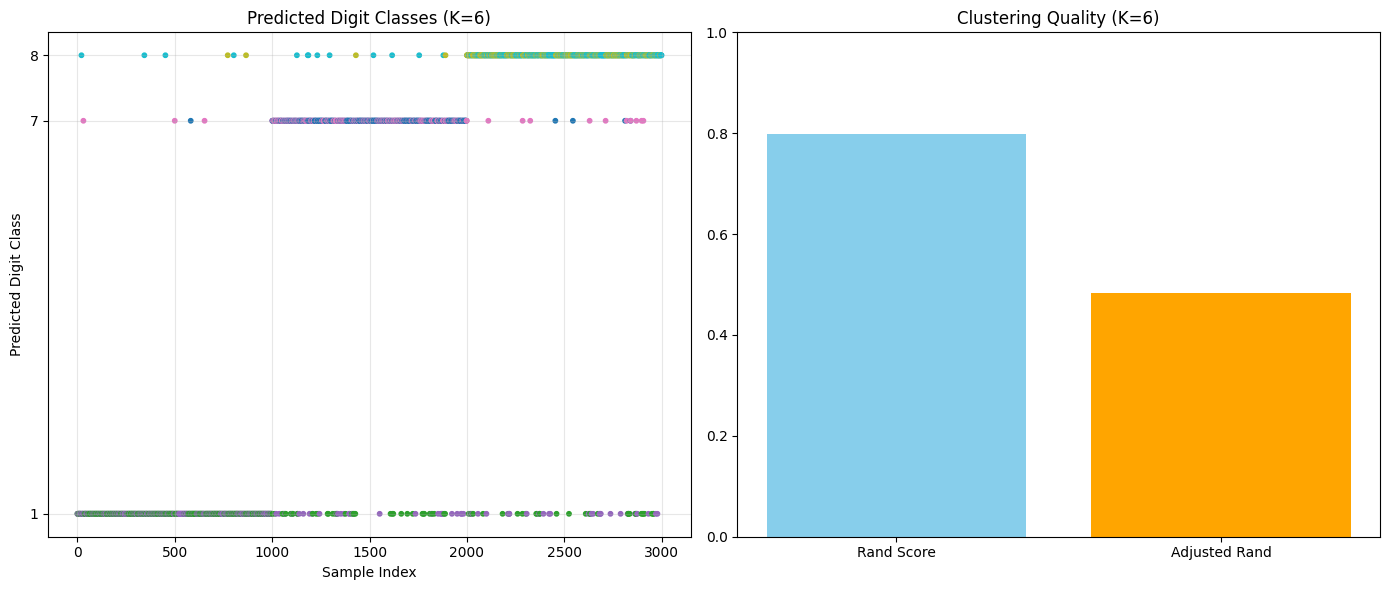

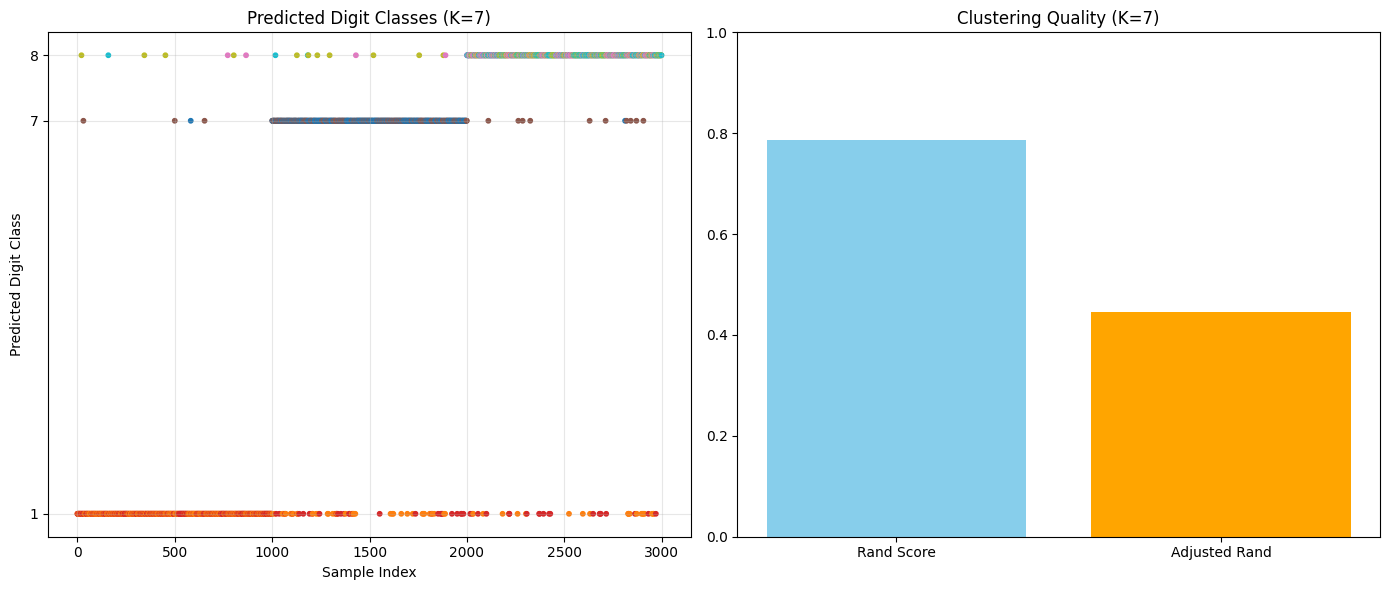

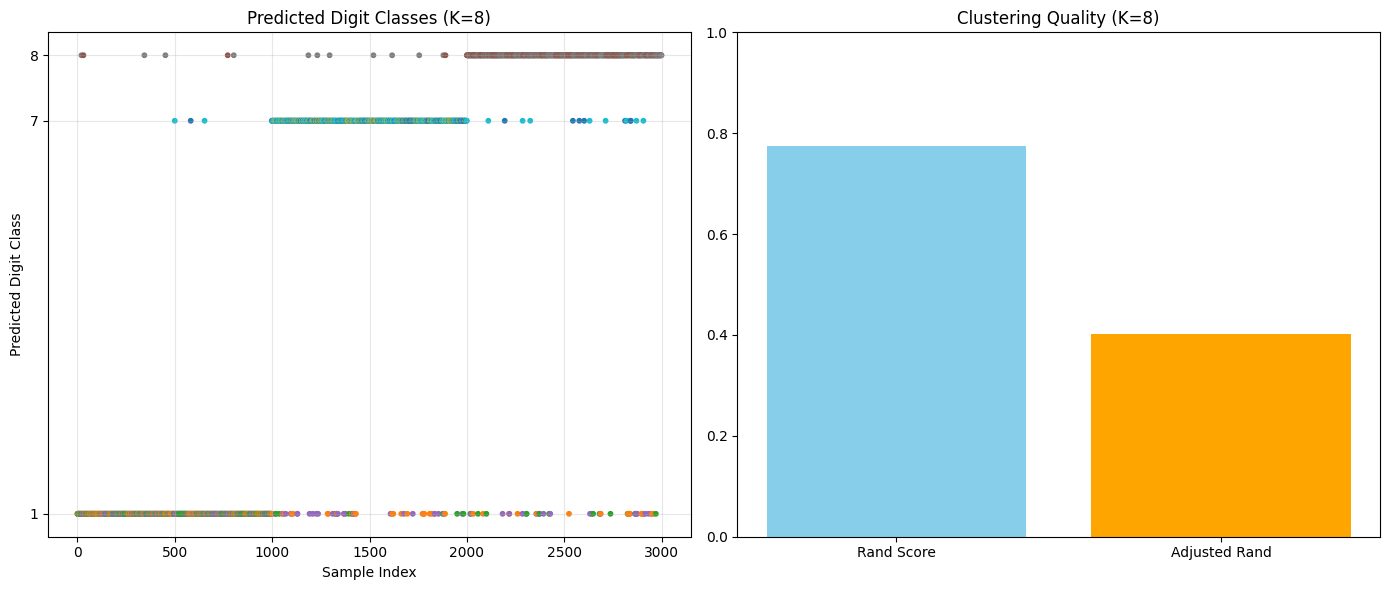

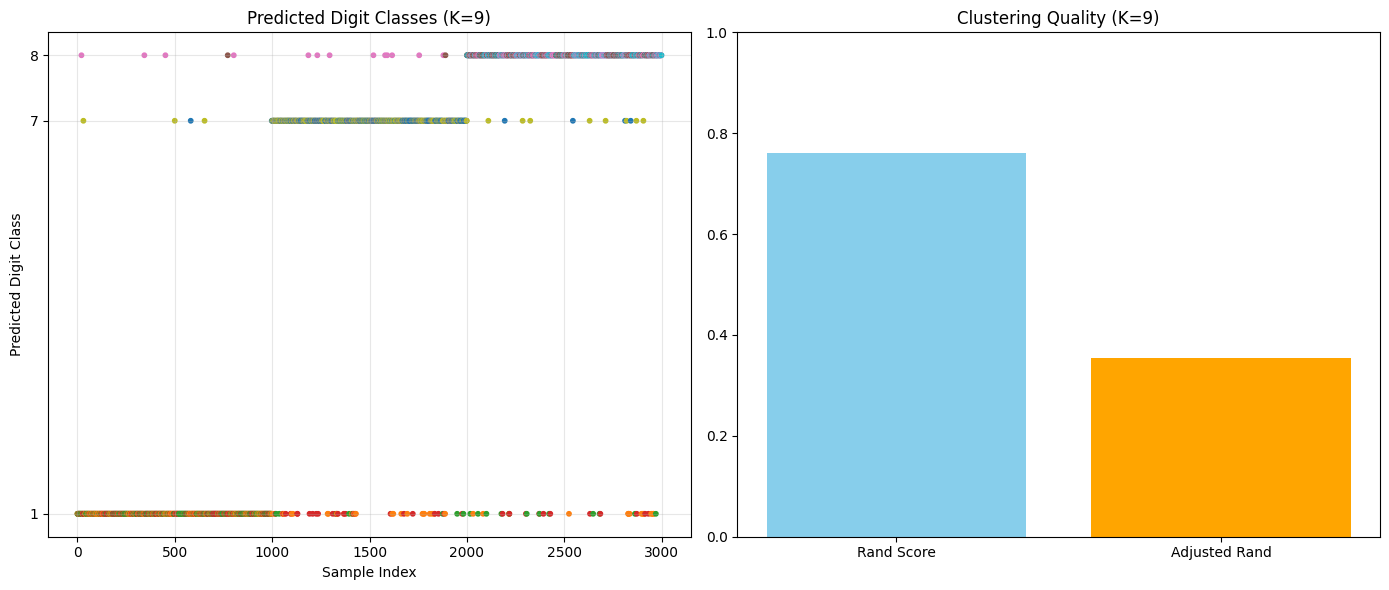

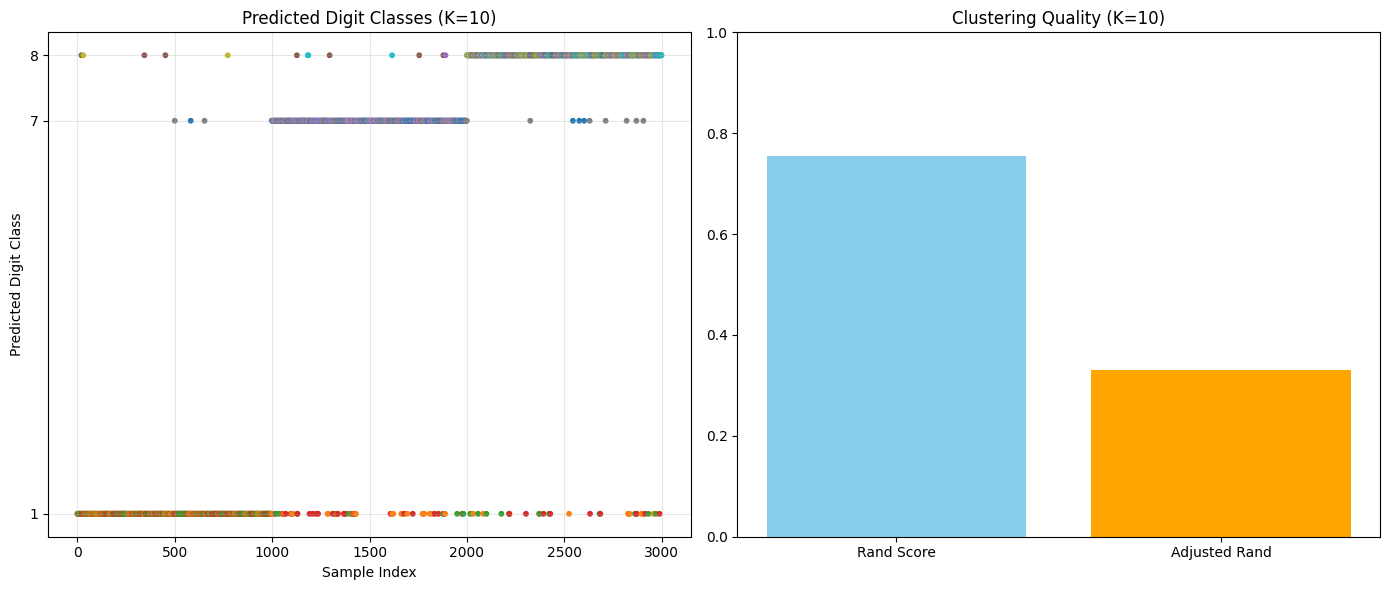

In [163]:
rs_scores = []
ars_scores = []

for k in range(2,11):
  kmeans_digits = KMeans(n_clusters=k, random_state=2).fit(x2)
  labels_digits = kmeans_digits.labels_
  rs = rand_score(y.ravel(), labels_digits)
  ars = adjusted_rand_score(y.ravel(), labels_digits)
  rs_scores.append(rs)
  ars_scores.append(ars)

  
  for cluster in np.unique(labels_digits):
      mask = labels_digits == cluster
      most_common = mode(y[mask], keepdims=True).mode[0]
      cluster_to_class[cluster] = most_common
  
  mapped_labels = np.array([cluster_to_class[label] for label in labels_digits])

  fig, axes = plt.subplots(1, 2, figsize=(14,6))

  
  axes[0].scatter(range(len(y)), mapped_labels, c=labels_digits, cmap='tab10', s=10)
  axes[0].set_xlabel("Sample Index")
  axes[0].set_ylabel("Predicted Digit Class")
  axes[0].set_title(f"Predicted Digit Classes (K={k})")
  axes[0].set_yticks([1, 7, 8])
  axes[0].grid(True, alpha=0.3)


  axes[1].bar(["Rand Score", "Adjusted Rand"], [rs, ars], color=["skyblue", "orange"])
  axes[1].set_ylim(0, 1)
  axes[1].set_title(f"Clustering Quality (K={k})")

  plt.tight_layout()
  plt.show()

As the number of clusters increases, the predictions become less accurate. In fact, both the Rand Score and the Adjusted Rand Score decrease with larger K. This happens because there are only three true classes in the dataset. When the number of clusters exceeds three, the clustering no longer aligns well with the ground truth, which leads to a drop in quality. 

Futhermore, in the signal, we can notice that more k increase, more the misclassifications seem to be less than before. This is less efficient than looking at the randscore but if we plot the labels bruts.

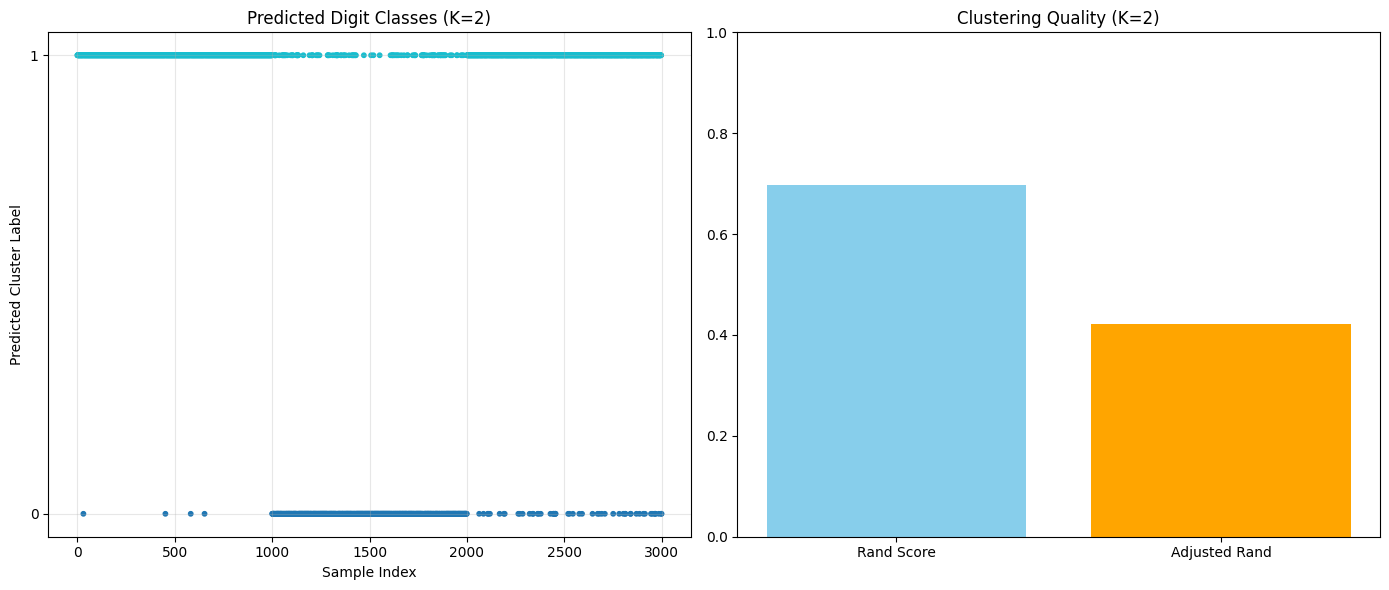

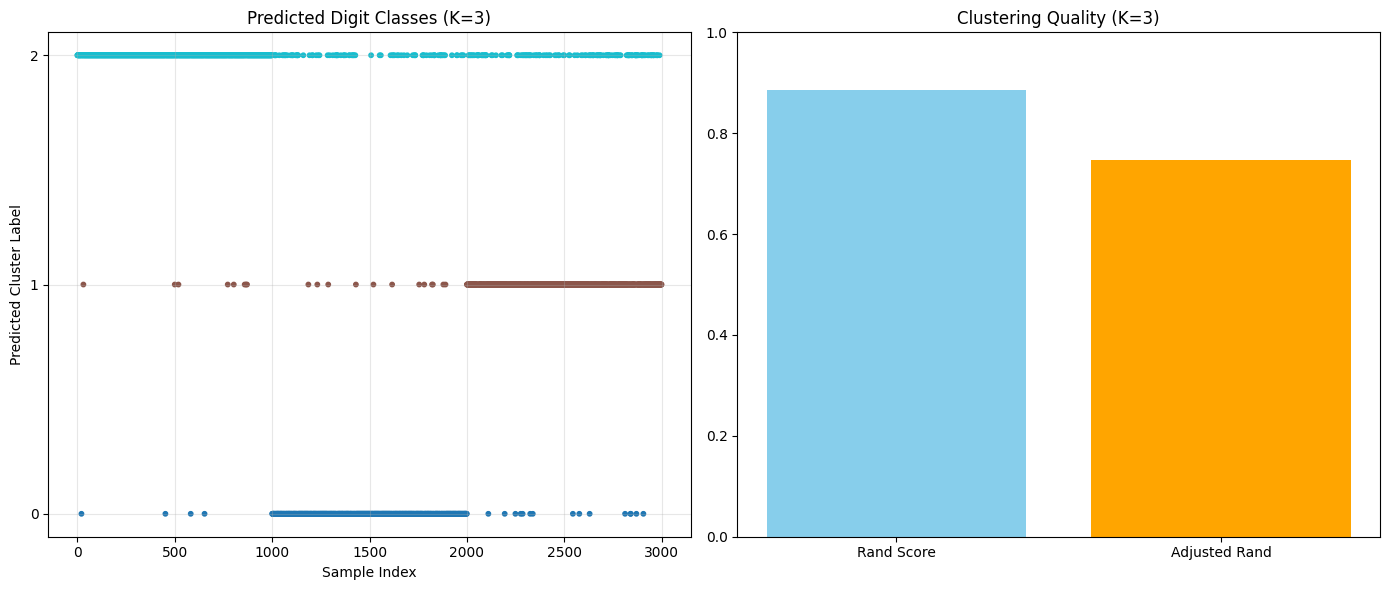

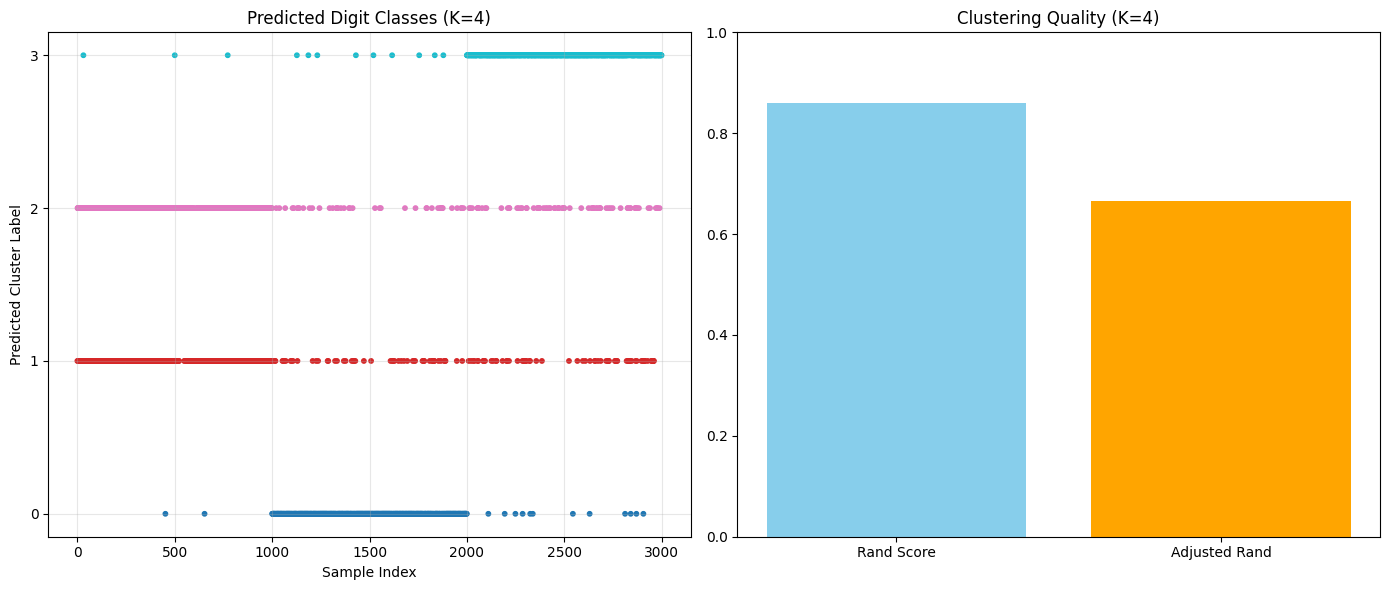

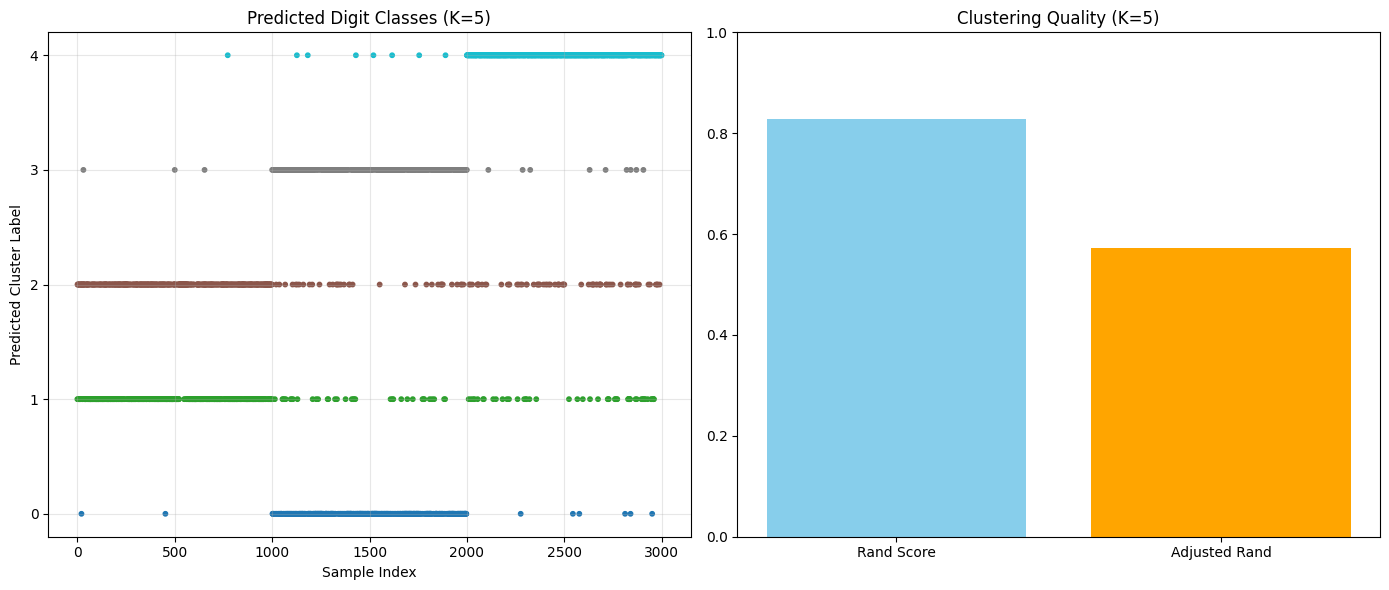

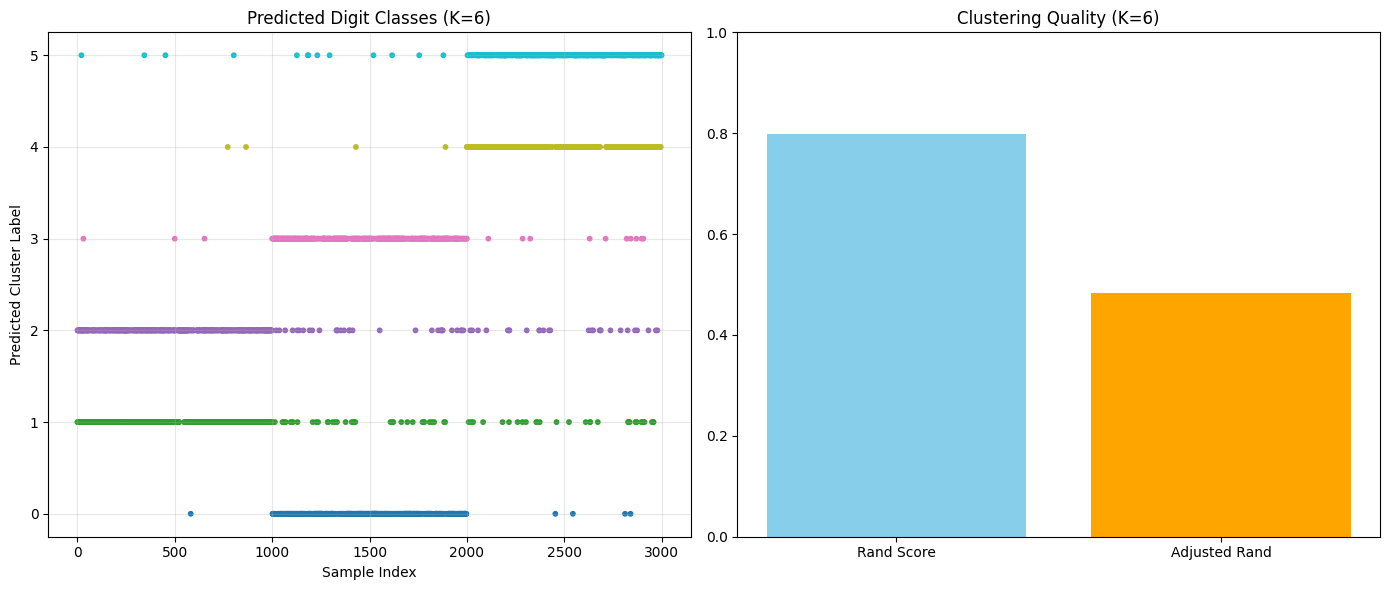

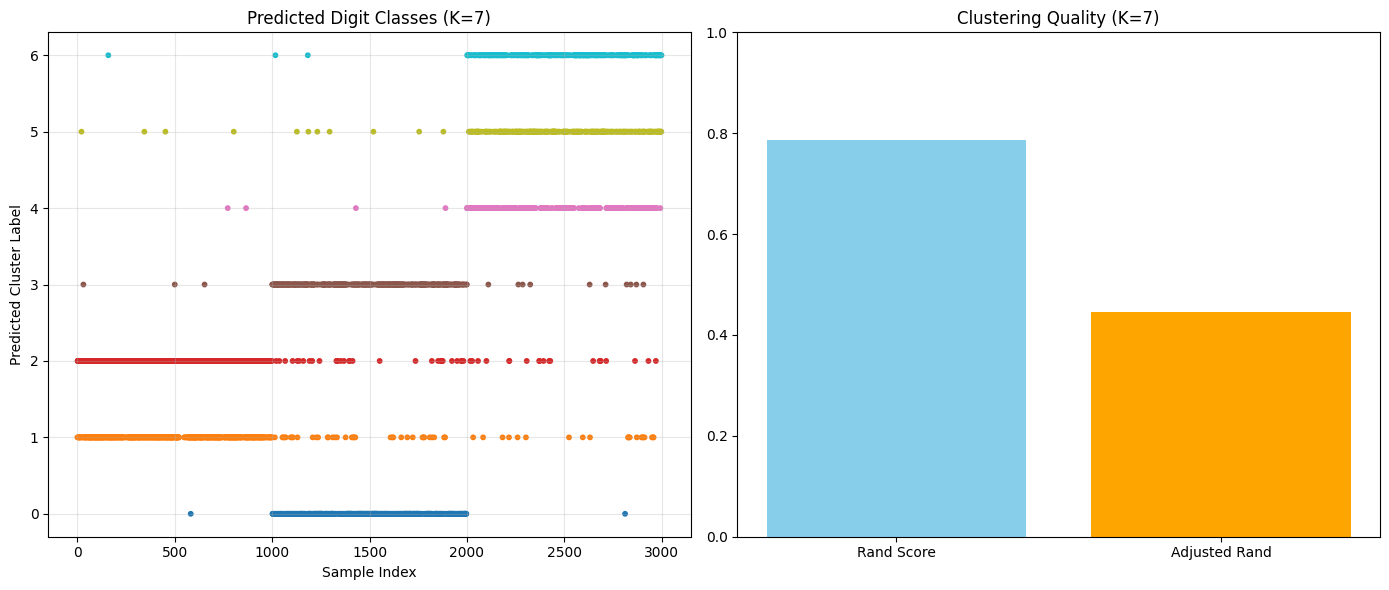

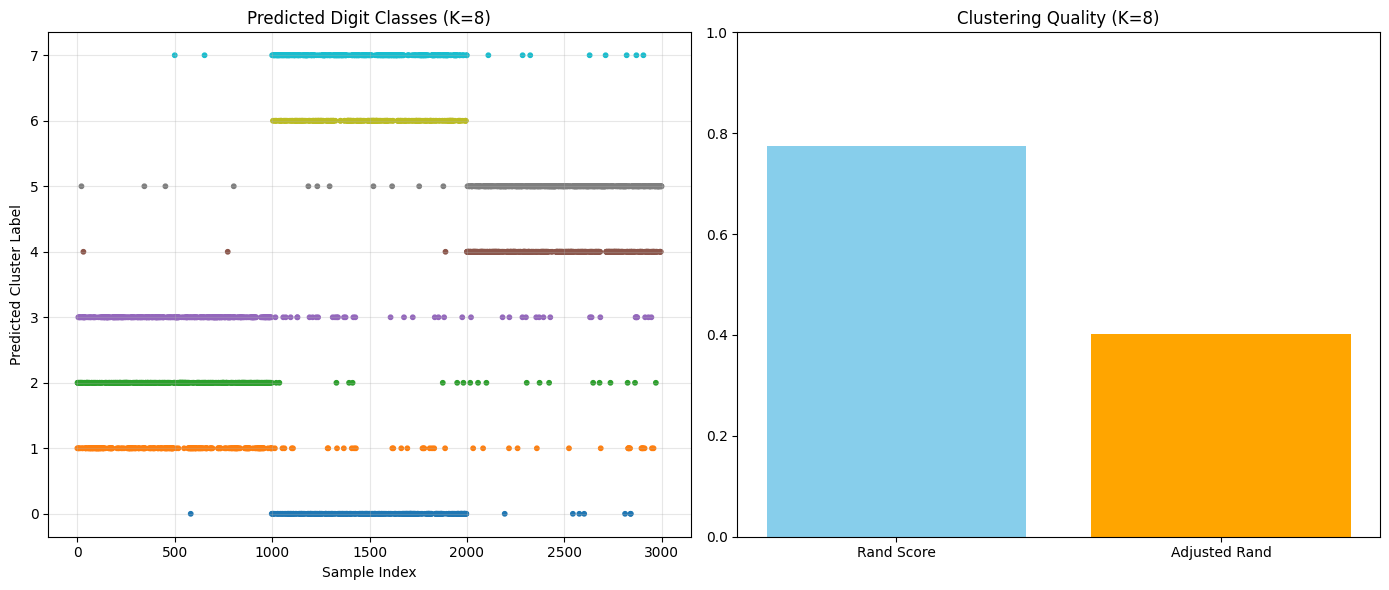

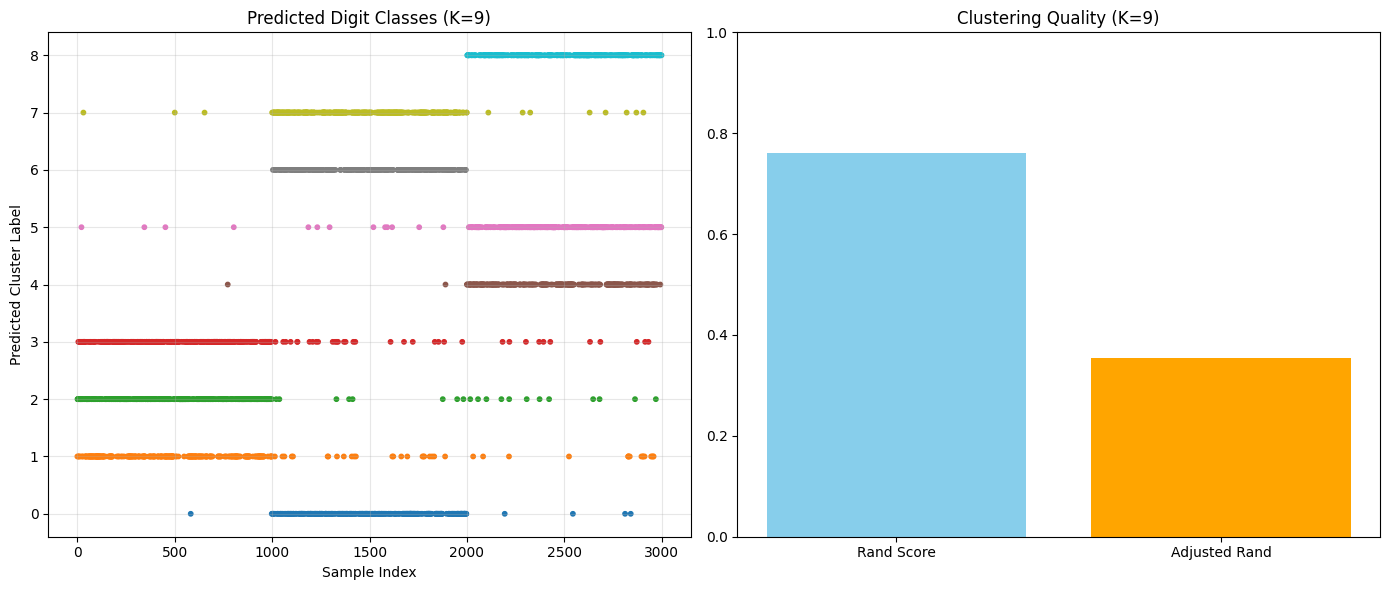

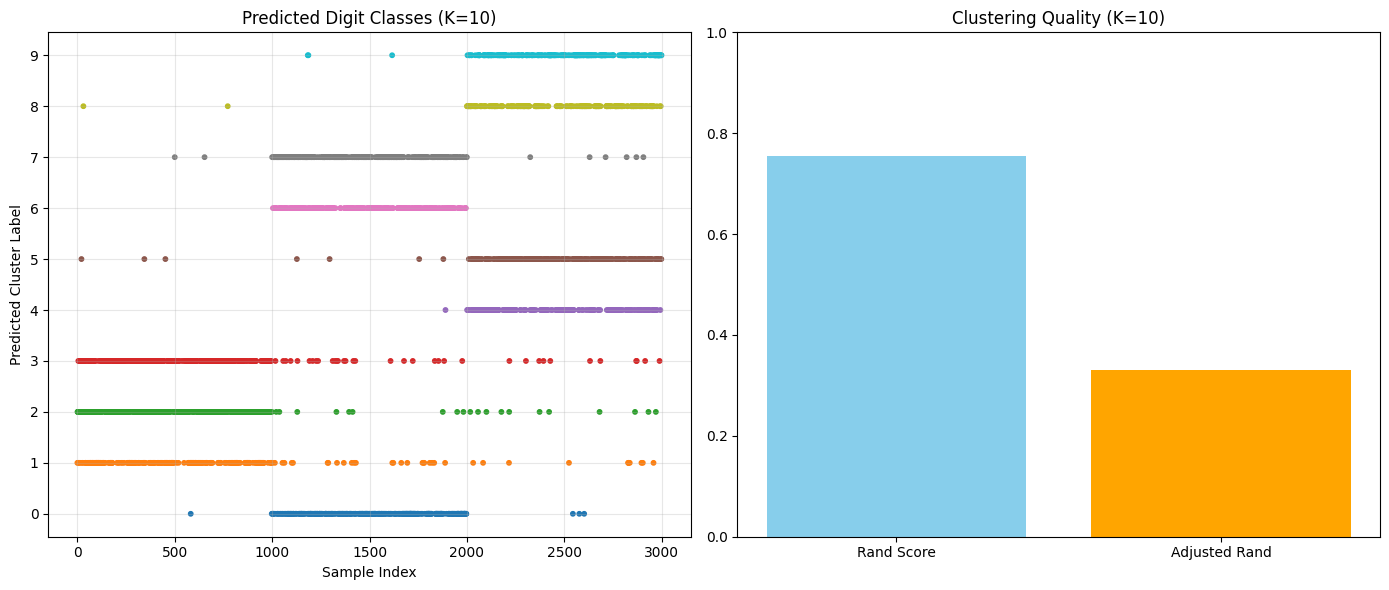

In [164]:
rs_scores = []
ars_scores = []

for k in range(2,11):
  kmeans_digits = KMeans(n_clusters=k, random_state=2).fit(x2)
  labels_digits = kmeans_digits.labels_
  rs = rand_score(y.ravel(), labels_digits)
  ars = adjusted_rand_score(y.ravel(), labels_digits)
  rs_scores.append(rs)
  ars_scores.append(ars)

  
  for cluster in np.unique(labels_digits):
      mask = labels_digits == cluster
      most_common = mode(y[mask], keepdims=True).mode[0]
      cluster_to_class[cluster] = most_common
  
  mapped_labels = np.array([cluster_to_class[label] for label in labels_digits])

  fig, axes = plt.subplots(1, 2, figsize=(14,6))

  
  axes[0].scatter(range(len(y)), labels_digits, c=labels_digits, cmap='tab10', s=10)
  axes[0].set_xlabel("Sample Index")
  axes[0].set_ylabel("Predicted Cluster Label")
  axes[0].set_title(f"Predicted Digit Classes (K={k})")
  axes[0].set_yticks(range(k))
  axes[0].grid(True, alpha=0.3)


  axes[1].bar(["Rand Score", "Adjusted Rand"], [rs, ars], color=["skyblue", "orange"])
  axes[1].set_ylim(0, 1)
  axes[1].set_title(f"Clustering Quality (K={k})")

  plt.tight_layout()
  plt.show()

Now, we can see why the Rand Score decreases when K increases. It is because when we have more clusters than true classes (K > 3), the algorithm creates artificial subdivisions within each true class. 

For example, with K=3, most digits of class "1" might be assigned to cluster 2. But with K=7, these same "1" digits might be split between clusters 1, 3, 5, and 6. Even though each individual cluster might be more "pure," the overall clustering no longer matches the ground truth structure, leading to a lower Rand Score.

This show the importance of choosing the right number of clusters. Too many clusters can actually hurt performance by over-segmenting the natural class structure.

**3 Density estimation**

**3.1 For both datasets**

**Temper.npz**

**Question 1**

In [165]:
gmm_temp = GaussianMixture(n_components=2, covariance_type='diag', random_state=0)
gmm_temp.fit(x1)


labels_temp = gmm_temp.predict(x1)
proba_temp = gmm_temp.predict_proba(x1)

print(labels_temp)
print(proba_temp)

[1 0 0 0 0 0 1 1 0 1 0 0 0 1 0]
[[2.07838509e-19 1.00000000e+00]
 [1.00000000e+00 1.07600778e-55]
 [1.00000000e+00 1.75048192e-33]
 [1.00000000e+00 4.39003889e-31]
 [1.00000000e+00 1.34575253e-70]
 [1.00000000e+00 9.11929823e-23]
 [7.20475944e-34 1.00000000e+00]
 [2.53965646e-28 1.00000000e+00]
 [1.00000000e+00 4.76395582e-19]
 [1.03894042e-41 1.00000000e+00]
 [1.00000000e+00 1.89765208e-28]
 [1.00000000e+00 1.86865206e-34]
 [1.00000000e+00 4.21385195e-67]
 [7.07392975e-07 9.99999293e-01]
 [1.00000000e+00 3.50968969e-40]]


**Question 2/3**

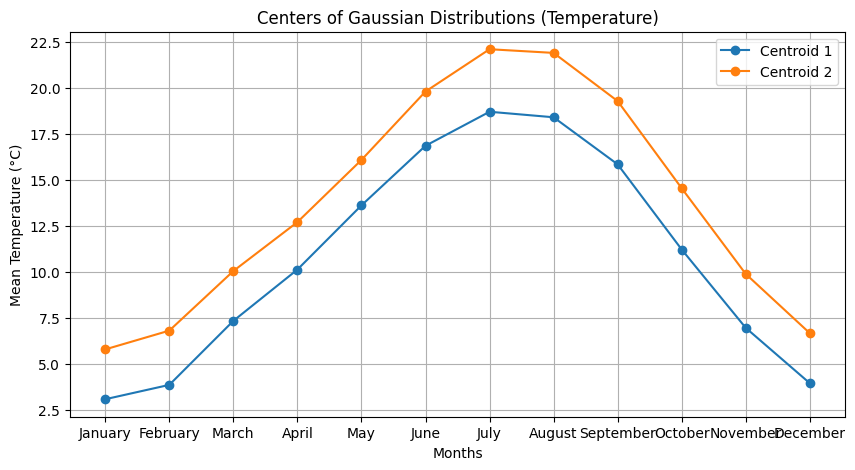

In [166]:
means_temp = gmm_temp.means_
plt.figure(figsize=(10,5))
for i, mean in enumerate(means_temp):
    plt.plot(range(1,13), mean, marker='o', label=f'Centroid {i+1}')
plt.xticks(range(1,13), months)
plt.xlabel("Months")
plt.ylabel("Mean Temperature (°C)")
plt.title("Centers of Gaussian Distributions (Temperature)")
plt.legend()
plt.grid()
plt.show()

The plotted centroids represent the mean temperatures of each cluster estimated by the Gaussian Mixture Model. Each line corresponds to a different cluster, showing the typical temperature pattern across the months.

For example, one centroid shows lower temperatures in winter and moderate temperatures in summer, which likely corresponds to cities with a colder climate (northern cities). Another centroid shows higher temperatures in summer and milder winters, representing cities with a warmer climate (southern).

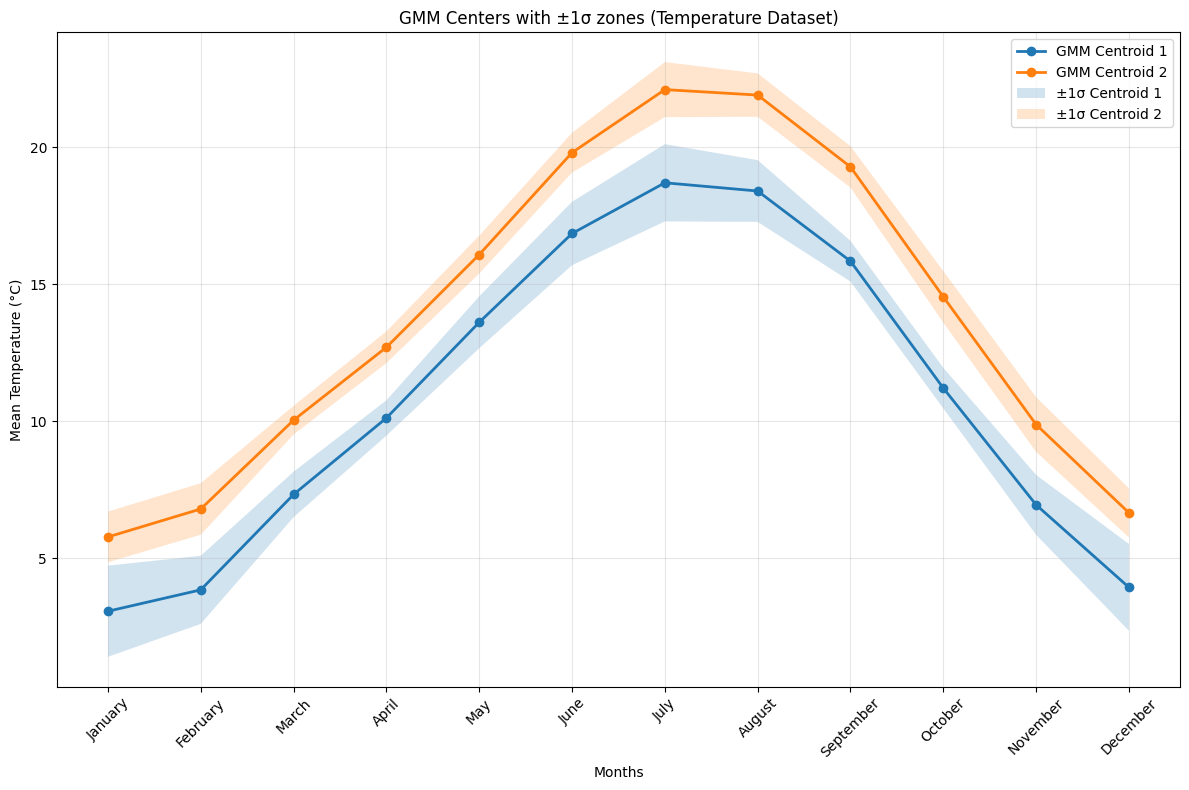

Covariance matrices shape: (2, 12)
GMM Centroid 1 - Standard deviations par mois:
[1.66315994 1.24277959 0.82951865 0.64467133 0.9470486  1.1569361
 1.40996496 1.12694337 0.7432371  0.74087871 1.09293234 1.58189791]

GMM Centroid 2 - Standard deviations par mois:
[0.92390527 0.94021323 0.52383293 0.57965583 0.69108673 0.72663671
 1.0039925  0.79246511 0.75471912 0.94148867 0.99879973 0.89576834]



In [167]:
covariances_temp = gmm_temp.covariances_

plt.figure(figsize=(12,8))


for i, mean in enumerate(means_temp):
    plt.plot(range(1,13), mean, marker='o', linewidth=2, label=f'GMM Centroid {i+1}')


for i, (mean, cov) in enumerate(zip(means_temp, covariances_temp)):
    std = np.sqrt(cov)  
    plt.fill_between(range(1,13), 
                     mean - std, 
                     mean + std, 
                     alpha=0.2, 
                     label=f'±1σ Centroid {i+1}')

plt.xticks(range(1,13), months, rotation=45)
plt.xlabel("Months")
plt.ylabel("Mean Temperature (°C)")
plt.title("GMM Centers with ±1σ zones (Temperature Dataset)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("Covariance matrices shape:", covariances_temp.shape)
for i, cov in enumerate(covariances_temp):
    print(f"GMM Centroid {i+1} - Standard deviations par mois:")
    print(np.sqrt(cov))  
    print()

This shows that the clusters are well separated. However, if the two zones overlap, it means that classification would be difficult with this number of clusters.

A word on the covariance type: we chose 'diag', which means the dispersion (standard deviation) around each centroid varies depending on the month, showing that the variability of temperatures is not uniform throughout the year.

In addition to that, the choice of diagonal covariance over full covariance reduces model complexity while still capturing the essential month-to-month variations. This is particularly important for our small dataset of 15 cities, where a full covariance matrix would have too many parameters to estimate reliably (so it would take more time of computation). The diagonal covariance works well here because while temperatures are correlated across months, the GMM clustering primarily separates cities based on their overall temperature profiles rather than complex inter-month dependencies.

If we try K=3, the ±1 standard deviation zones of the centroids overlap, it indicates that the clusters are not well separated for those months, making classification more difficult and uncertain. So, the best K is 2 for the GMM's method.



**Question 4**

Indices des villes outliers: [ 1 12]
Log probabilities des outliers: [-30.66152562 -23.88056866]


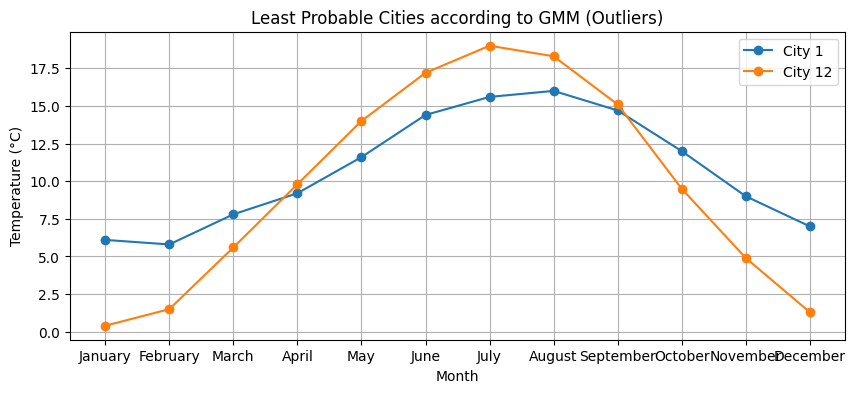

In [168]:
log_probs_temp = gmm_temp.score_samples(x1)

N_outliers = 2 # Given that there are 15 cities in the dataset, we will not choose 5 outliers because it's 1/3 of the dataset. And it would be a non-sense
outlier_indices_temp = np.argsort(log_probs_temp)[:N_outliers]

print("Indices des villes outliers:", outlier_indices_temp)
print("Log probabilities des outliers:", log_probs_temp[outlier_indices_temp])

plt.figure(figsize=(10,4))
for i, idx in enumerate(outlier_indices_temp):
    plt.plot(range(1,13), x1[idx], marker='o', label=f'City {idx}')
plt.xticks(range(1,13), months)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Least Probable Cities according to GMM (Outliers)")
plt.legend()
plt.grid()
plt.show()

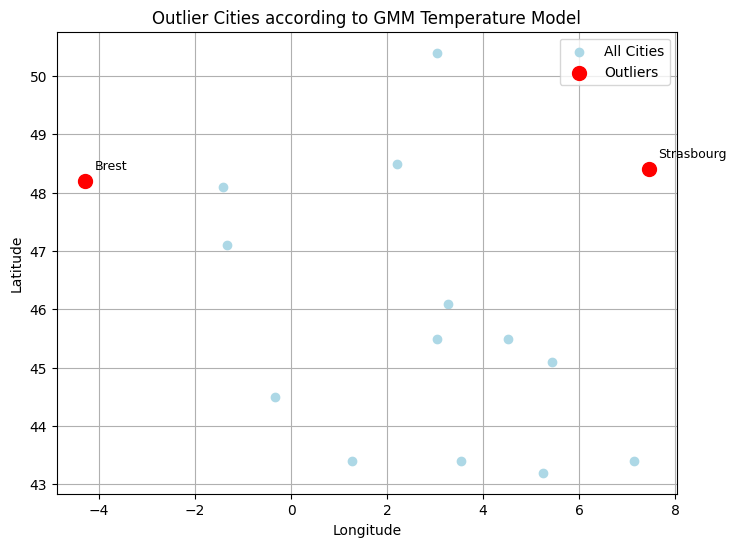

In [169]:
plt.figure(figsize=(8,6))

plt.scatter(coords[:,1], coords[:,0], color='lightblue', label='All Cities')


plt.scatter(coords[outlier_indices_temp,1], coords[outlier_indices_temp,0],
            color='red', label='Outliers', s=100)


for idx in outlier_indices_temp:
    plt.text(coords[idx,1]+0.2, coords[idx,0]+0.2, villes[idx], fontsize=9)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Outlier Cities according to GMM Temperature Model")
plt.legend()
plt.grid(True)
plt.show()

It makes sense that Strasbourg and Brest appear as outliers, since their temperature patterns are atypical compared to other French cities—Strasbourg has a more continental climate with colder winters, while Brest is strongly influenced by the ocean, leading to milder temperatures.

**Question 6**

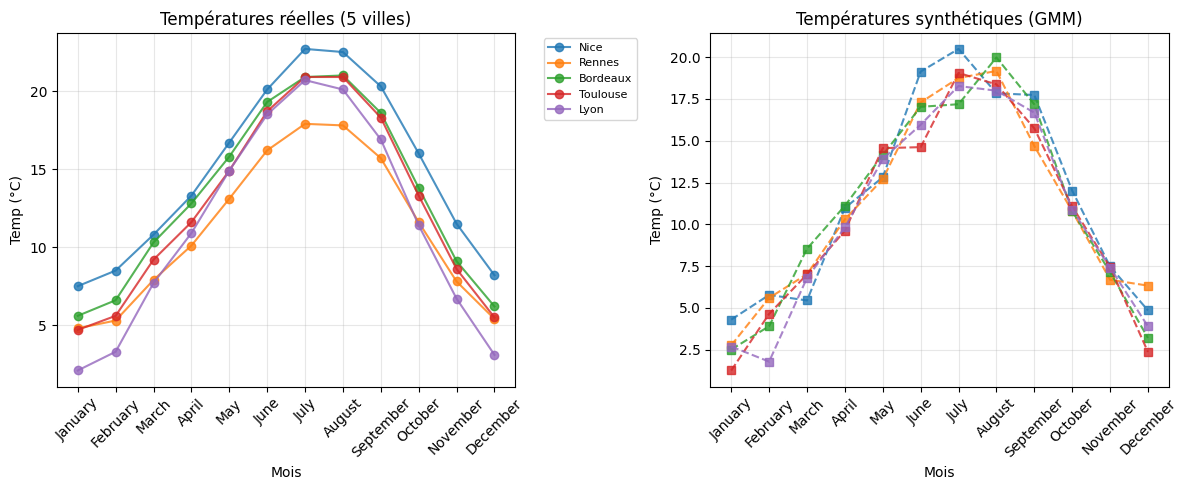

In [170]:
np.random.seed(42)

n_samples_temp = 10
X_synth_temp, z_synth_temp = gmm_temp.sample(n_samples_temp)  


idx_real = np.random.choice(len(x1), size=5, replace=False)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in idx_real:
    plt.plot(range(1,13), x1[i], 'o-', alpha=0.8, label=villes[i])
plt.xticks(range(1,13), months, rotation=45)
plt.title("Températures réelles (5 villes)")
plt.xlabel("Mois"); plt.ylabel("Temp (°C)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=8)

plt.subplot(1,2,2)
for i in range(5):
    plt.plot(range(1,13), X_synth_temp[i], 's--', alpha=0.8, label=f'Synth {i+1}')
plt.xticks(range(1,13), months, rotation=45)
plt.title("Températures synthétiques (GMM)")
plt.xlabel("Mois"); plt.ylabel("Temp (°C)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

By visually comparing the real temperatures with those generated by the GMM, we can see that the synthetic data captures the seasonal trends and temperature amplitudes of the cities quite well.

**Digits.npz**

**Question 1**

In [171]:
gmm_digits = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmm_digits.fit(x2)


labels_digits = gmm_digits.predict(x2)
proba_digits = gmm_digits.predict_proba(x2)

print(labels_digits)
print(proba_digits)

[1 1 1 ... 1 2 2]
[[0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 1.04858414e-62]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [4.25134152e-79 0.00000000e+00 1.00000000e+00]]


**Question 2**

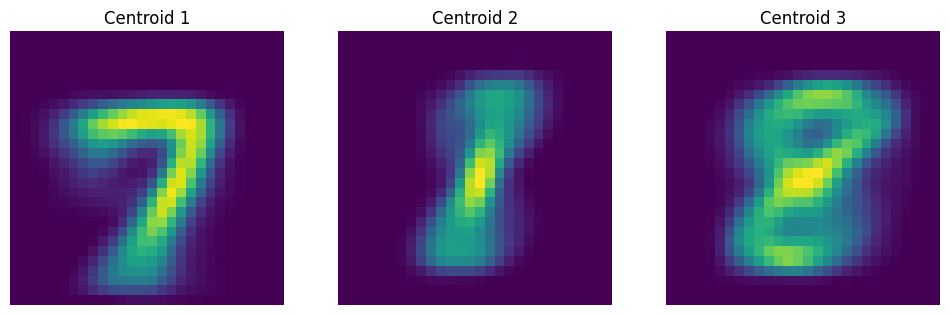

In [172]:
means_digits = gmm_digits.means_
plt.figure(figsize=(12,4))
for i, mean in enumerate(gmm_digits.means_):
    plt.subplot(1, 3, i+1)
    plt.imshow(mean.reshape(28,28))
    plt.title(f'Centroid {i+1}')
    plt.axis('off')
plt.show()

The plotted centroids represent the mean images of each cluster estimated by the Gaussian Mixture Model. Each centroid is the average of all images assigned to the corresponding cluster, reshaped into a 28x28 image.

We can recognize the digits that each cluster corresponds to. For example, one centroid may resemble a '1', another a '7', and the third an '8'. These centroids highlight the common patterns and general shapes of the digits in each cluster, while individual variations and noise are blurred out.

Compared to K-Means, the centroids obtained with GMM are blurrier because the model assigns samples to clusters probabilistically. Each image can contribute to several components with different weights, which smooths the resulting averages, while K-Means produces sharper centroids due to hard cluster assignments.”


For the digits dataset, I did not plot the standard deviation of each Gaussian component because I was unsure of its usefulness. Since each image has 784 dimensions, visualizing the dispersion around each centroid would be very hard to interpret, and the main information is already captured by the mean images (centroids).

**Question 3**

It's hard to choose a godd K, i tried for K=4, 5. For 4 and 5 , the centroids were blurry but 2 centroids were the same so it was sure that over 3 was too much.

For K=2, the centroids were very blurry, we couldn't recognize a digit. So 3 is the best K.

For 'diag', the centroids are blurry but we can easily recognize them. If we choose 'full', it seems to be more precize but the cell take more time to execute.

For 'spherical', the centroids are vers blurry, this is normal because the variance is the same for every pixels.
For 'tied', it is pretty much the same as spherical.

**Question 4**

Indices des outliers: [ 452  265 1809  150 2100]
Log probabilities des outliers: [-10700.67504777  -7579.48892597  -4860.9043222   -2735.51306047
  -2668.000696  ]


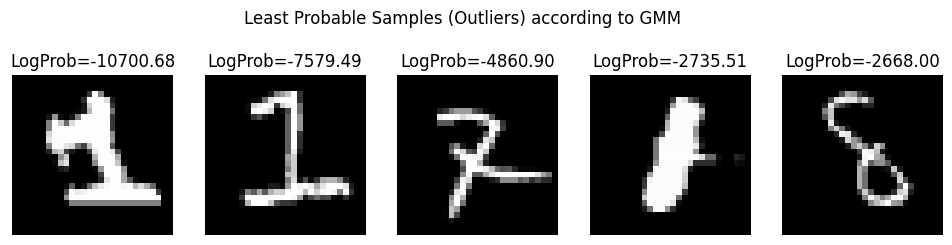

In [173]:
log_probs = gmm_digits.score_samples(x2)

N_outliers = 5 # as in the lecture
outlier_indices = np.argsort(log_probs)[:N_outliers]

print("Indices des outliers:", outlier_indices)
print("Log probabilities des outliers:", log_probs[outlier_indices])

plt.figure(figsize=(12,3))
for i, idx in enumerate(outlier_indices):
    plt.subplot(1, N_outliers, i+1)
    plt.imshow(x2[idx].reshape(28,28), cmap='gray')
    plt.title(f'LogProb={log_probs[idx]:.2f}')
    plt.axis('off')

plt.suptitle("Least Probable Samples (Outliers) according to GMM")
plt.show()


The 5 images are outliers because we can barely recognize a number on it. In facts, the one with the lowest log-probability look like nothing, not even a number.

**Question 5**


In [174]:
labels_gmm = gmm_digits.predict(x2)


rs_digits = rand_score(y.ravel(), labels_gmm)
print("Rand Score:", rs_digits)



Rand Score: 0.7615936423252195


For the digits dataset, KMeans achieves a higher Adjusted Rand Score (0.886) compared to GMM (0.762). This means KMeans clusters match the true digit classes better. I'm a bit suuprise because GMM is a bit more complicated than K-means and without computing and even thinking, I would say that GMM was better.

The second things to say is that GMM recognize the outliers, not Kmeans. The outliers do not cheat enough on the results to make GMM better.

Before doing the lab, I would have said that K-Means would perform worse than GMM in this case, due to the greater “complexity” and flexibility of GMM compared to K-Means.

**Question 6 (Bonus)**


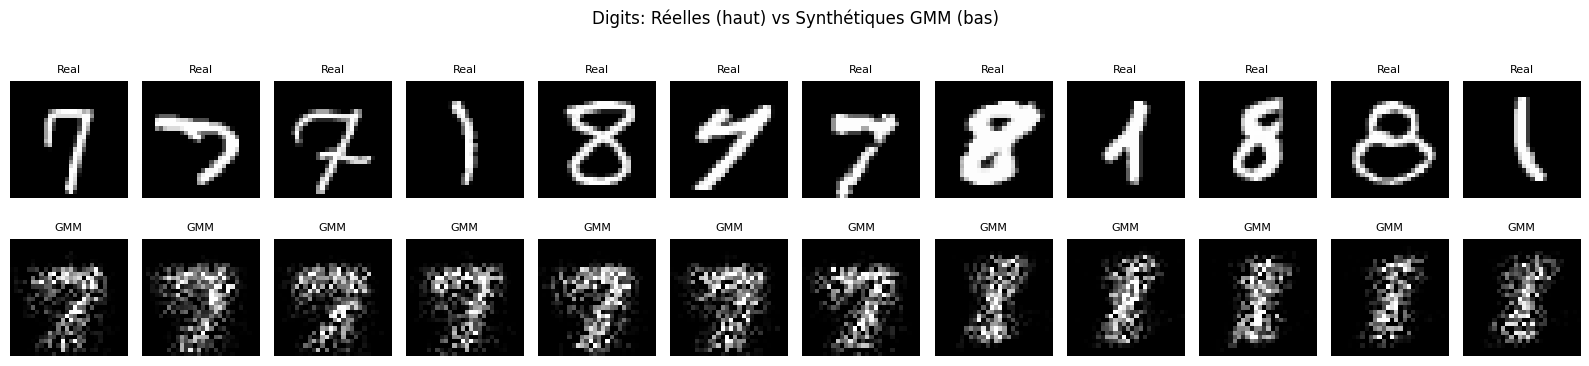

In [175]:
np.random.seed(42)

n_samples_digits = 24
X_synth_digits, z_synth_digits = gmm_digits.sample(n_samples_digits)  # shape (n, 784)
X_synth_digits = np.clip(X_synth_digits, 0, 1)  


idx_real = np.random.choice(len(x2), size=n_samples_digits, replace=False)
X_real_digits = x2[idx_real]

cols = 12
rows = 2
plt.figure(figsize=(16,4))


for i in range(cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_real_digits[i].reshape(28,28), cmap='gray')
    plt.title("Real", fontsize=8)
    plt.axis('off')

for i in range(cols):
    plt.subplot(rows, cols, cols + i + 1)
    plt.imshow(X_synth_digits[i].reshape(28,28), cmap='gray')
    plt.title("GMM", fontsize=8)
    plt.axis('off')

plt.suptitle("Digits: Réelles (haut) vs Synthétiques GMM (bas)")
plt.tight_layout()
plt.show()

The samples generated from the model are clearly distinguishable from the real digits, suggesting that the model does not capture all the fine details and variability of the dataset. The "new" data set provides blurry images which tells us that the GMM methods is not really good for this dataset.

**4 Dimensionality reduction**

**4.1 Linear Projection : Principal Component Analysis**

**Temper.npz**

**Question 1**

[[4.0292381  3.65095238 2.56380952 1.73657143 1.0952381  1.2202381
  1.26880952 1.63619048 2.23961905 3.12414286 3.44290476 3.90704762]
 [3.65095238 3.49095238 2.6602381  2.01214286 1.53666667 1.75738095
  1.9502381  2.21047619 2.62333333 3.215      3.32333333 3.5497619 ]
 [2.56380952 2.6602381  2.33809524 1.98928571 1.76380952 2.0752381
  2.34880952 2.45547619 2.57333333 2.71       2.55761905 2.49619048]
 [1.73657143 2.01214286 1.98928571 2.00171429 2.02785714 2.39071429
  2.74785714 2.70142857 2.55828571 2.344      1.99557143 1.716     ]
 [1.0952381  1.53666667 1.76380952 2.02785714 2.26380952 2.68166667
  3.14309524 2.96761905 2.6197619  2.12071429 1.60404762 1.12190476]
 [1.2202381  1.75738095 2.0752381  2.39071429 2.68166667 3.21666667
  3.78595238 3.56761905 3.11690476 2.48357143 1.85190476 1.26904762]
 [1.26880952 1.9502381  2.34880952 2.74785714 3.14309524 3.78595238
  4.53238095 4.24333333 3.67047619 2.87785714 2.10119048 1.35047619]
 [1.63619048 2.21047619 2.45547619 2.701428

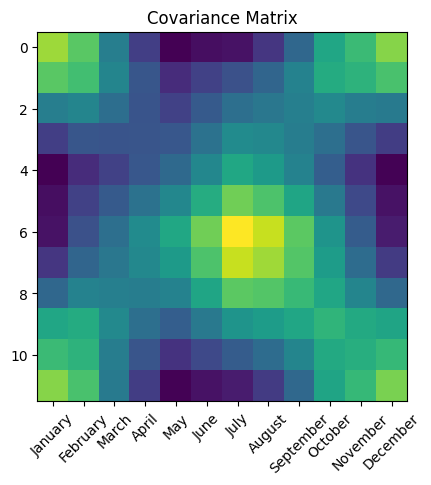

In [176]:
cov_temp = np.cov(x1.T)

print(cov_temp)

plt.title('Covariance Matrix')
plt.xticks(np.arange(12), months, rotation=45)
plt.imshow(cov_temp)

Cij=Covariance(temperature of month i,temperature of month j)

We can observe correlations between the monthly temperatures measured across the 15 cities.
The greener the color, the higher the positive correlation, meaning that temperatures in these months tend to vary together.
As expected, colder months such as January, February, November, and December form a green block, indicating that they are highly correlated.
Conversely, when a colder month crosses a warmer one (for example, January vs July), the color becomes blue, reflecting a negative covariance between winter and summer temperature

**Question 2**

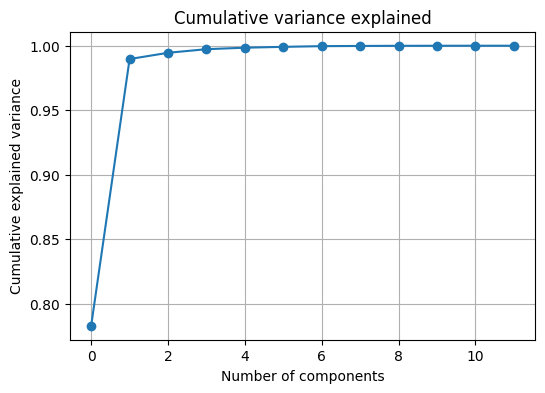

In [177]:
pca = PCA(n_components=None)
pca.fit(x1)
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative variance explained")
plt.grid(True)
plt.show()

More thant 90 % of the variance is captured by the 2 first component.

In [178]:
print(explained_var)
print("Somme totale :", np.sum(explained_var))

[7.83110305e-01 2.06569899e-01 4.84535068e-03 2.79489336e-03
 1.14488366e-03 6.57394899e-04 5.57874105e-04 1.40975158e-04
 1.10823960e-04 4.29735573e-05 2.29442453e-05 1.68278390e-06]
Somme totale : 1.0


The sum of the variance is equal to 1

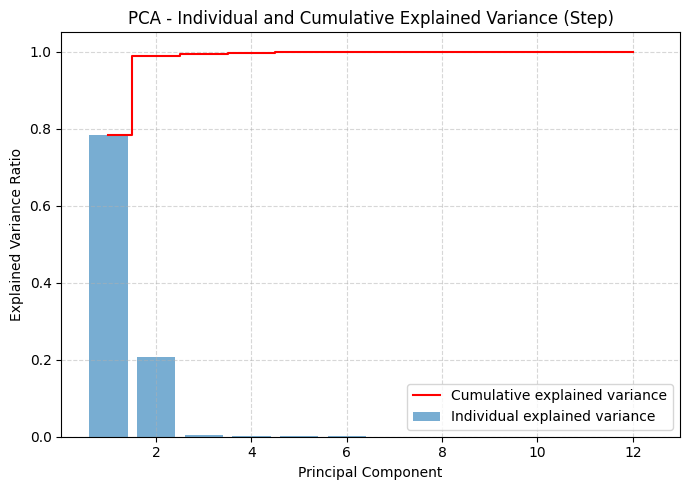

Variance explained by first 2 components: 0.9896802035903167


In [179]:
plt.figure(figsize=(7,5))


plt.bar(range(1, len(explained_var)+1), explained_var,
        alpha=0.6, label="Individual explained variance")


plt.step(range(1, len(explained_var)+1), np.cumsum(explained_var),
         where='mid', color='red', label="Cumulative explained variance")

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Individual and Cumulative Explained Variance (Step)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

var_2D = np.sum(explained_var[:2])
print("Variance explained by first 2 components:", var_2D)



The PCA algorithm considers all the columns (months) and calculates orthogonal directions in the feature space that capture the maximum variance.
The first two principal components account for more than 90% of the total variance, which allows us to effectively reduce the dimensionality of the data from 12 to 2 while retaining most of the information.

**Question 3**

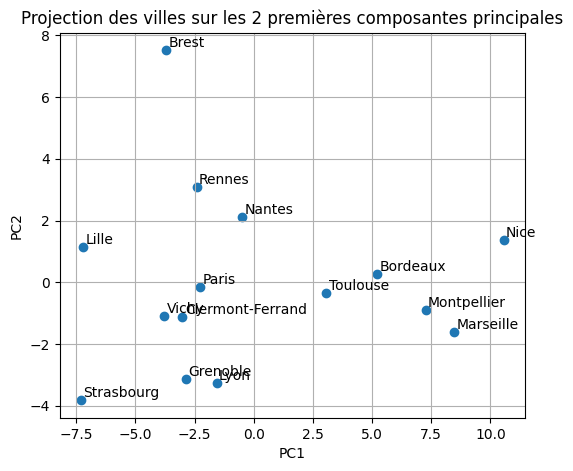

In [180]:
pc_scores = pca.transform(x1)[:, :2]

plt.figure(figsize=(6,5))
plt.scatter(pc_scores[:,0], pc_scores[:,1])
for i, ville in enumerate(villes):
    plt.text(pc_scores[i,0]+0.1, pc_scores[i,1]+0.1, ville)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des villes sur les 2 premières composantes principales")
plt.grid(True)
plt.show()


**Question 4**

First Principal Component (PC1):
[0.27765046 0.29726177 0.26549892 0.24426184 0.23276055 0.27461466
 0.31796069 0.32160147 0.32149157 0.32257588 0.2946594  0.27575128]

Second Principal Component (PC2):
[ 0.44271144  0.29596995  0.07437784 -0.10733591 -0.25565325 -0.3209949
 -0.40635887 -0.31355378 -0.1457905   0.09718023  0.25000485  0.41750952]


<Figure size 1200x600 with 0 Axes>

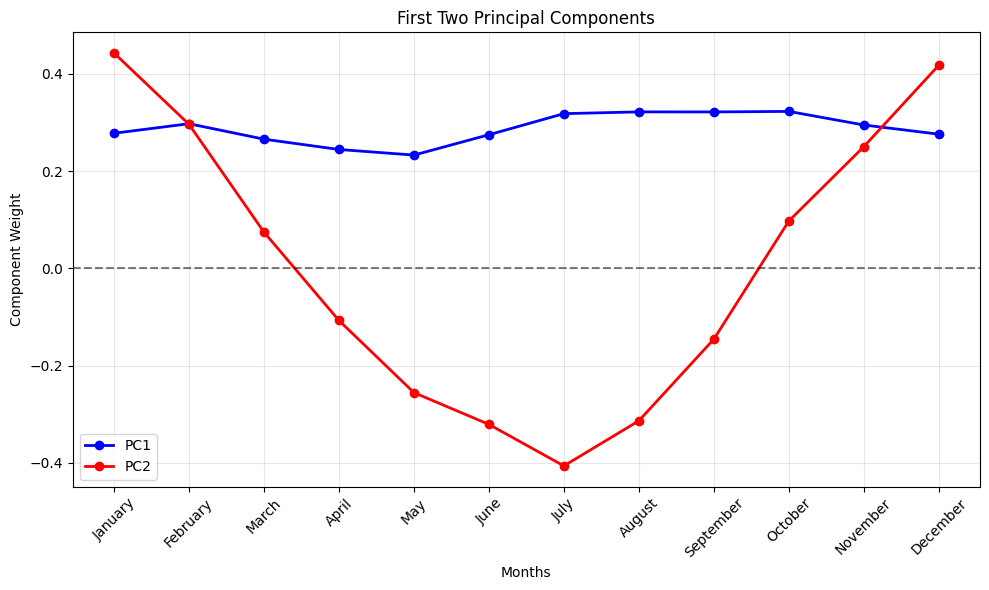

In [181]:
pc1 = pca.components_[0]  # First principal component
pc2 = pca.components_[1]  # Second principal component

print("First Principal Component (PC1):")
print(pc1)
print("\nSecond Principal Component (PC2):")
print(pc2)


plt.figure(figsize=(12, 6))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), pc1, marker='o', color='blue', linewidth=2, label='PC1')
plt.plot(range(1, 13), pc2, marker='o', color='red', linewidth=2, label='PC2')
plt.xticks(range(1, 13), months, rotation=45)
plt.xlabel("Months")
plt.ylabel("Component Weight")
plt.title("First Two Principal Components")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

PC1 (Blue line):
- Shows relatively uniform positive weights across all months (approximately 0.25-0.3)
- All coefficients are positive
- Cities with high PC1 scores have generally higher temperatures across all months
- Increasing along this direction corresponds to a uniform increase in temperature across all months (warmer climate overall)
- This captures the information of a difference between north and south in France.

PC2 (Red line):
- Shows clear seasonal contrast with a distinctive pattern:
  - Positive weights in winter months (Jan, Feb, Nov, Dec)
  - Negative weights in summer months (June, July, August)
  - Zero crossing around spring/autumn transitions
Which is pretty ok according to our knowledge. The difference between winter and summer temperatures is highly highlighted


Conclusion : 
- PC1 separates cities by their annual average temperature
- PC2 separates cities by their seasonal variability 
- Together, they create a natural climate classification system where:
  - High PC1, Low PC2 → Warm, stable climates 
  - Low PC1, High PC2 → Cold, variable climates 
  - Low PC1, Low PC2 → Cool, stable climates 


**Question 5**

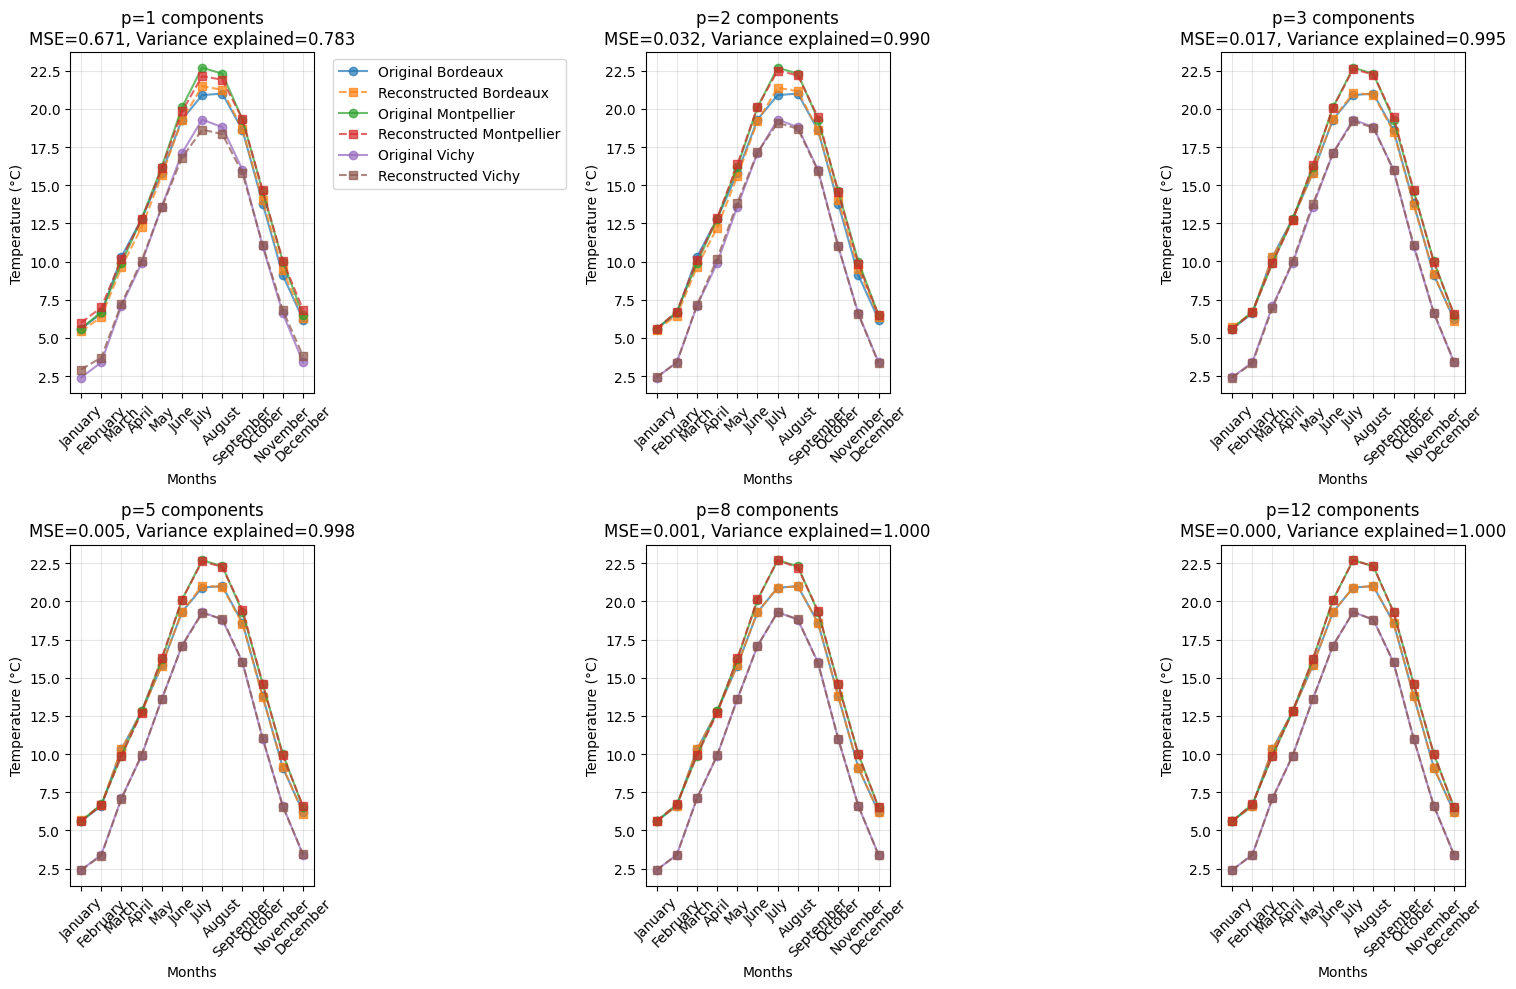

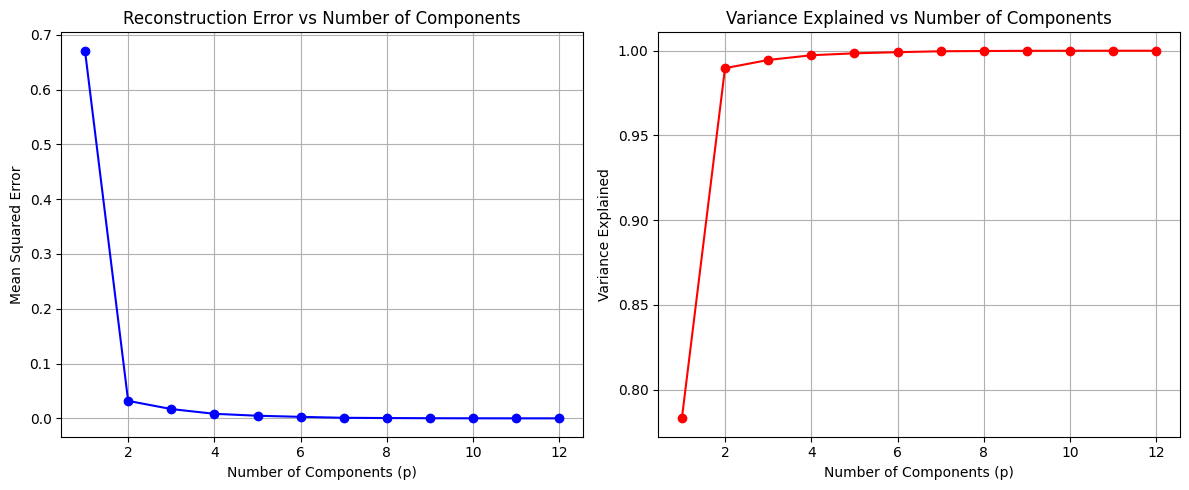

Reconstruction Quality Analysis:
p=1: MSE=0.6710, Variance Explained=0.7831
p=2: MSE=0.0319, Variance Explained=0.9897
p=5: MSE=0.0047, Variance Explained=0.9985
p=12: MSE=0.0000, Variance Explained=1.0000


In [182]:
dimensions_to_test = [1, 2, 3, 5, 8, 12]  
sample_cities = [0, 7, 14]  

plt.figure(figsize=(15, 10))

for i, p in enumerate(dimensions_to_test):
    pca_p = PCA(n_components=p)
    pca_p.fit(x1)
    
    x_projected = pca_p.transform(x1)
    x_reconstructed = pca_p.inverse_transform(x_projected)
    

    mse = mean_squared_error(x1, x_reconstructed)
    
    plt.subplot(2, 3, i+1)
    
    for city_idx in sample_cities:
        plt.plot(range(1, 13), x1[city_idx], 'o-', alpha=0.7, 
                label=f'Original {villes[city_idx]}')
        plt.plot(range(1, 13), x_reconstructed[city_idx], 's--', alpha=0.7,
                label=f'Reconstructed {villes[city_idx]}')
    
    plt.xticks(range(1, 13), months, rotation=45)
    plt.xlabel("Months")
    plt.ylabel("Temperature (°C)")
    plt.title(f'p={p} components\nMSE={mse:.3f}, Variance explained={np.sum(pca_p.explained_variance_ratio_):.3f}')
    plt.grid(True, alpha=0.3)
    if i == 0:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

mse_values = []
variance_explained = []

for p in range(1, 13):
    pca_p = PCA(n_components=p)
    pca_p.fit(x1)
    x_projected = pca_p.transform(x1)
    x_reconstructed = pca_p.inverse_transform(x_projected)
    
    mse = mean_squared_error(x1, x_reconstructed)
    mse_values.append(mse)
    variance_explained.append(np.sum(pca_p.explained_variance_ratio_))



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mse_values, 'bo-')
plt.xlabel("Number of Components (p)")
plt.ylabel("Mean Squared Error")
plt.title("Reconstruction Error vs Number of Components")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 13), variance_explained, 'ro-')
plt.xlabel("Number of Components (p)")
plt.ylabel("Variance Explained")
plt.title("Variance Explained vs Number of Components")
plt.grid(True)

plt.tight_layout()
plt.show()

print("Reconstruction Quality Analysis:")
for p in [1, 2, 5, 12]:
    pca_p = PCA(n_components=p)
    pca_p.fit(x1)
    x_projected = pca_p.transform(x1)
    x_reconstructed = pca_p.inverse_transform(x_projected)
    mse = mean_squared_error(x1, x_reconstructed)
    var_exp = np.sum(pca_p.explained_variance_ratio_)
    print(f"p={p}: MSE={mse:.4f}, Variance Explained={var_exp:.4f}")


If 𝑝=1 : 

The model captures only the mean temperature, resulting in poor data reconstruction. When 

if p=2 : 

It captures more than 90% of the variance, and both PC1 and PC2 are well reconstructed. There is no reason to choose 

p greater than 2, as the goal is to achieve data compression and simplification, we loose t much compression for a gain of variance wich is not very high.

It is logical that more p tends to 12, more the reconstruction is well. 



**Digitz.npz**

**Question 1**

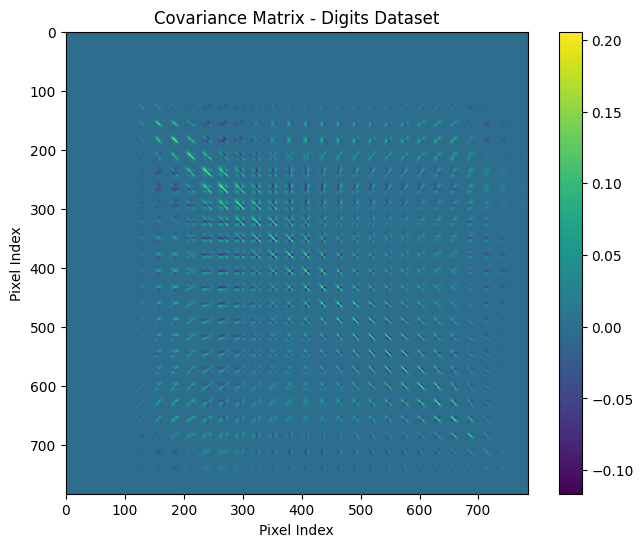

In [183]:
cov_digits = np.cov(x2.T)  

plt.figure(figsize=(8, 6))
plt.imshow(cov_digits)
plt.title('Covariance Matrix - Digits Dataset')
plt.colorbar()

plt.xlabel('Pixel Index')
plt.ylabel('Pixel Index')
plt.show()

We don't see well what we want to see so we reduce th cov matrix

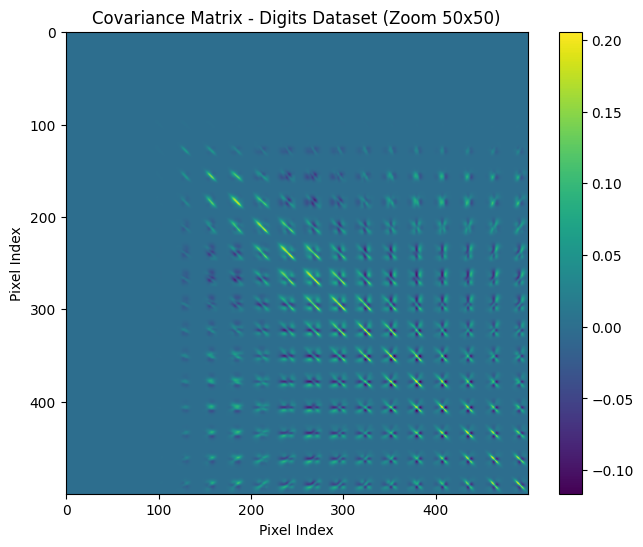

In [184]:
corr_digits = np.corrcoef(x2.T)



plt.figure(figsize=(8,6))
plt.imshow(cov_digits[:500, :500], cmap='viridis')  # zoom sur les 50 premiers pixels
plt.title('Covariance Matrix - Digits Dataset (Zoom 50x50)')
plt.colorbar()
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Index')
plt.show()

That's pretty funny because the covariance matrix looks similar to the temperature one, but way bigger (784×784 vs 12×12).

We can notice : 

- Neighboring pixels tend to be correlated (you see diagonal patterns)
- Edge pixels (corners) have lower correlations because they're mostly background
- The center region has stronger correlations because that's where the digit shapes are

Unlike temperature where correlations had seasonal meaning, here correlations show spatial relationships between pixels. But the visual pattern is surprisingly similar.

This structure explains why PCA works well on digits neighboring pixels are strongly correlated, so we can compress the data effectively while keeping the important shape information.

**Question 2**

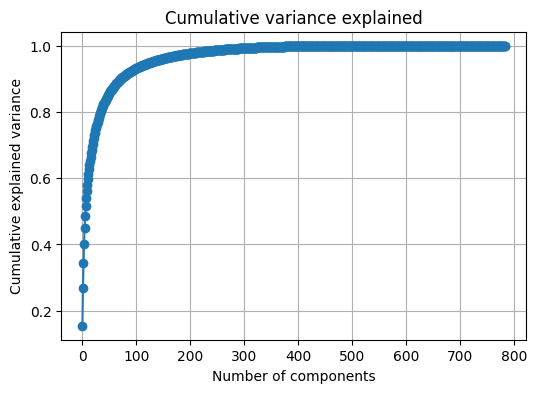

90% de variance capturée avec 73 composantes
Variance exacte: 0.901


In [185]:

pca_digits = PCA(n_components=None)
pca_digits.fit(x2)  
explained_var = pca_digits.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative variance explained")
plt.grid(True)
plt.show()

cumsum_var = np.cumsum(explained_var)
n_components_90 = np.argmax(cumsum_var >= 0.90) + 1
print(f"90% de variance capturée avec {n_components_90} composantes")
print(f"Variance exacte: {cumsum_var[n_components_90-1]:.3f}")

In [186]:
print(explained_var)
print("Somme totale :", np.sum(explained_var))

[1.54529879e-01 1.14975901e-01 7.34879888e-02 5.96661052e-02
 4.59545360e-02 3.61839618e-02 3.22402815e-02 2.27725098e-02
 2.04414365e-02 1.82903460e-02 1.80577700e-02 1.59965610e-02
 1.41498524e-02 1.35489432e-02 1.25195215e-02 1.15199273e-02
 1.06540297e-02 1.02737905e-02 9.63213062e-03 9.42521835e-03
 9.11772214e-03 8.58722921e-03 8.08306146e-03 7.44876709e-03
 6.92802569e-03 6.82157012e-03 6.61414802e-03 6.53397017e-03
 6.23801421e-03 5.81675442e-03 5.53862081e-03 5.32358876e-03
 5.10804449e-03 4.86291764e-03 4.67896393e-03 4.57672359e-03
 4.31747992e-03 4.24456396e-03 4.01267265e-03 3.82741652e-03
 3.62726114e-03 3.58181582e-03 3.50018014e-03 3.44739888e-03
 3.27495057e-03 3.15908979e-03 3.06328836e-03 2.99676460e-03
 2.81999623e-03 2.70386106e-03 2.67470421e-03 2.60535805e-03
 2.52182364e-03 2.43972794e-03 2.30205249e-03 2.28581240e-03
 2.20989643e-03 2.16725824e-03 2.12557101e-03 2.04324035e-03
 2.01011813e-03 1.93064599e-03 1.90735612e-03 1.89134300e-03
 1.83276615e-03 1.803794

**Question 3**

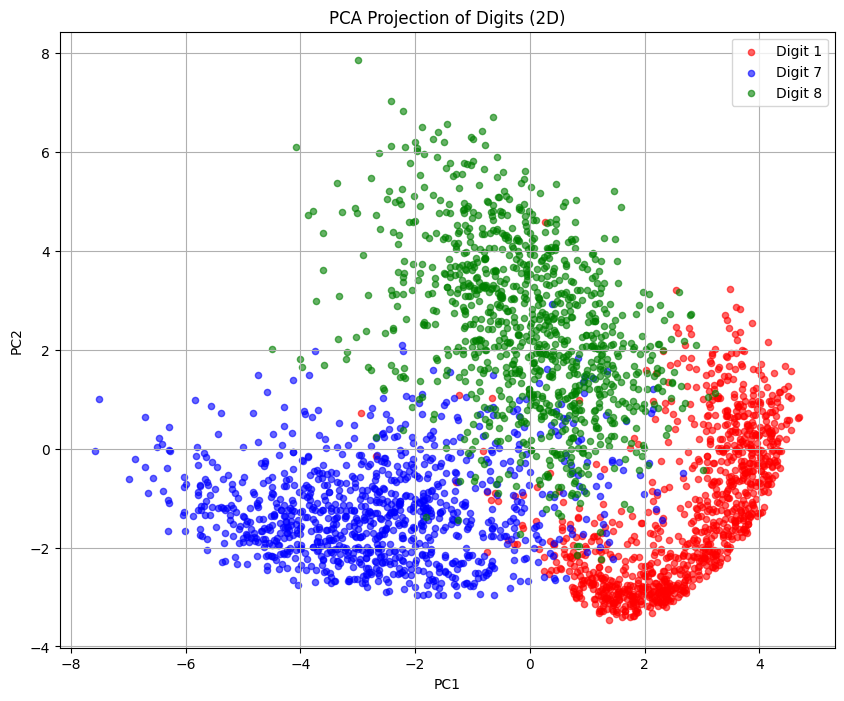

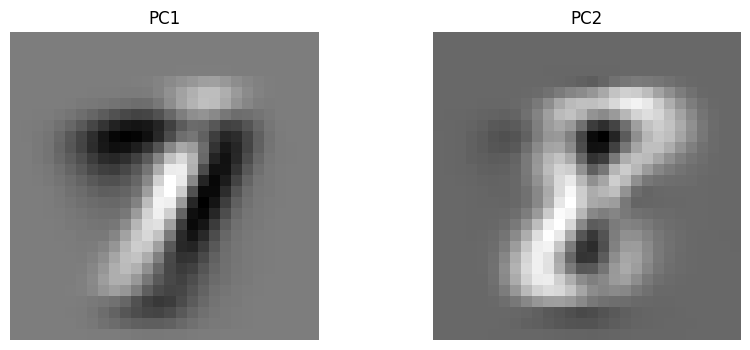

In [187]:
pca_digits_2d = PCA(n_components=2)
pca_digits_2d.fit(x2)

digits_projected = pca_digits_2d.transform(x2)

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
unique_classes = np.unique(y.flatten())

for i, digit_class in enumerate(unique_classes):
    mask = (y.flatten() == digit_class)
    plt.scatter(digits_projected[mask, 0], digits_projected[mask, 1], 
               c=colors[i], alpha=0.6, s=20, label=f'Digit {digit_class}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Digits (2D)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(pca_digits_2d.components_[0].reshape(28, 28), cmap='gray')
plt.title('PC1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pca_digits_2d.components_[1].reshape(28, 28), cmap='gray')
plt.title('PC2')
plt.axis('off')
plt.show()

The digits 1 and 7 are well separated, so the clusters are distinct. However, the cluster of 8 is more variable and complex. This is expected because digits 1 and 7 have simpler, more linear structures, while digit 8 has a more complex curved topology with loops.

Furthermore, PC1 primarily captures the distinction between thin vertical structures (like digits 1 and 7) versus more complex shapes. PC2 captures variations in orientation, curvature, and structural complexity. Particularly useful for distinguishing digit 8's curved features from the linear patterns of digits 1 and 7.


**Question 4**

PC1 shape: (784,)
PC2 shape: (784,)


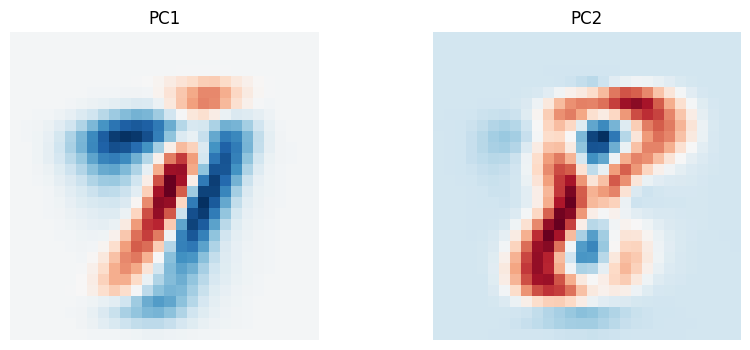

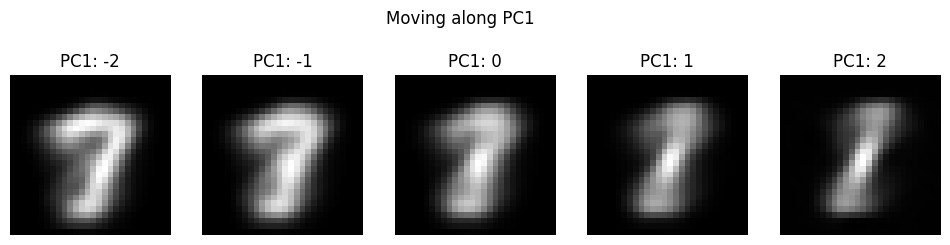

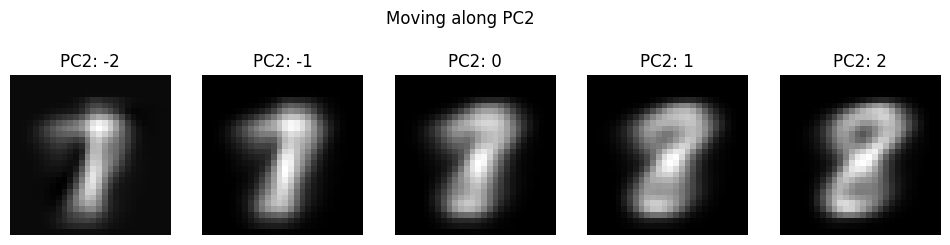

In [188]:
pc1 = pca_digits_2d.components_[0]
pc2 = pca_digits_2d.components_[1]

print("PC1 shape:", pc1.shape)
print("PC2 shape:", pc2.shape)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(pc1.reshape(28, 28), cmap='RdBu_r')
plt.title('PC1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pc2.reshape(28, 28), cmap='RdBu_r')
plt.title('PC2')
plt.axis('off')
plt.show()


mean_digit = np.mean(x2, axis=0)
scales = [-2, -1, 0, 1, 2]


plt.figure(figsize=(12, 3))
for i, scale in enumerate(scales):
    modified = mean_digit + scale * pc1
    plt.subplot(1, 5, i+1)
    plt.imshow(modified.reshape(28, 28), cmap='gray')
    plt.title(f'PC1: {scale}')
    plt.axis('off')
plt.suptitle('Moving along PC1')
plt.show()


plt.figure(figsize=(12, 3))
for i, scale in enumerate(scales):
    modified = mean_digit + scale * pc2
    plt.subplot(1, 5, i+1)
    plt.imshow(modified.reshape(28, 28), cmap='gray')
    plt.title(f'PC2: {scale}')
    plt.axis('off')
plt.suptitle('Moving along PC2')
plt.show()

The darker the red, the more that part contributes to the variation in the data. We can notice that PC1 mainly captures simple, straight forms rather than curved ones, while PC2 captures variations in orientation and curvature.

When we move along PC1, the shape evolves from a straight digit to a more complex one. In contrast, along PC2, the shape transitions from a straight digit to a curved digit.

**Question 5**

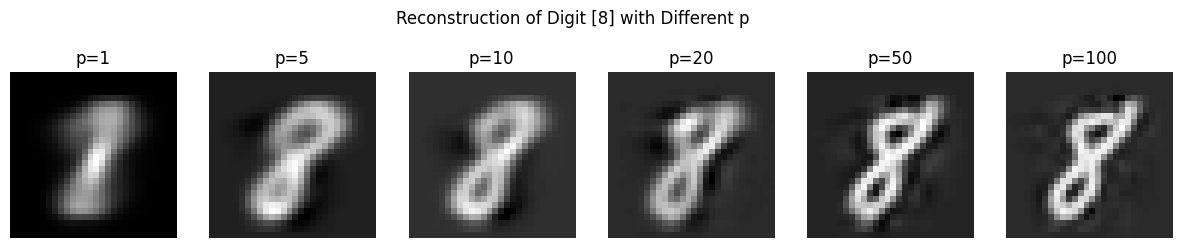

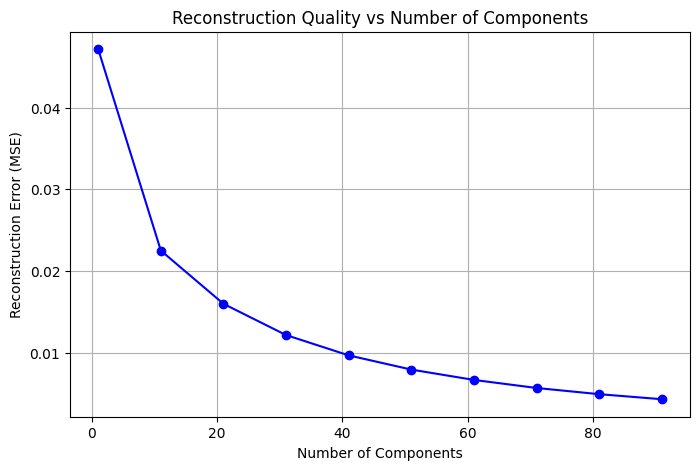

In [189]:
p_values = [1, 5, 10, 20, 50, 100]
digit_idx = 2000

plt.figure(figsize=(15, 3))
for i, p in enumerate(p_values):
    pca_p = PCA(n_components=p)
    pca_p.fit(x2)
    
    
    x_proj = pca_p.transform(x2[digit_idx:digit_idx+1])
    x_recon = pca_p.inverse_transform(x_proj)
    
    plt.subplot(1, len(p_values), i+1)
    plt.imshow(x_recon.reshape(28, 28), cmap='gray')
    plt.title(f'p={p}')
    plt.axis('off')

plt.suptitle(f'Reconstruction of Digit {y[digit_idx]} with Different p')
plt.show()


mse_values = []
p_range = range(1, 101, 10)

for p in p_range:
    pca_p = PCA(n_components=p)
    pca_p.fit(x2)
    x_proj = pca_p.transform(x2)
    x_recon = pca_p.inverse_transform(x_proj)
    mse = mean_squared_error(x2, x_recon)
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(p_range, mse_values, 'bo-')
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Quality vs Number of Components")
plt.grid()
plt.show()


As p increases, the reconstructed images become clearer and more detailed. The reconstruction error (MSE) decreases with more components, which is expected behavior.


- With p=1: The image is very blurry, almost unrecognizable
- With p=5-10: We can start to see the general shape of the digit
- With p=20-50: The digit becomes clearly recognizable but still somewhat blurry
- With p=100: The reconstruction is very close to the original

Since we capture 90% of the variance with p=73 components, there's a significant quality jump between p=50 and p=100. This validates our results.

For this types of applications, p=20-50 might be optimal because:
- We get good compression (784 → 20-50 dimensions)
- The digits are still recognizable 
- Further compression beyond this point makes the images too blurry for reliable digit recognition


**4.2 Manifold Learning : TSNE**

**Temper.npz**

**Question 1/2**

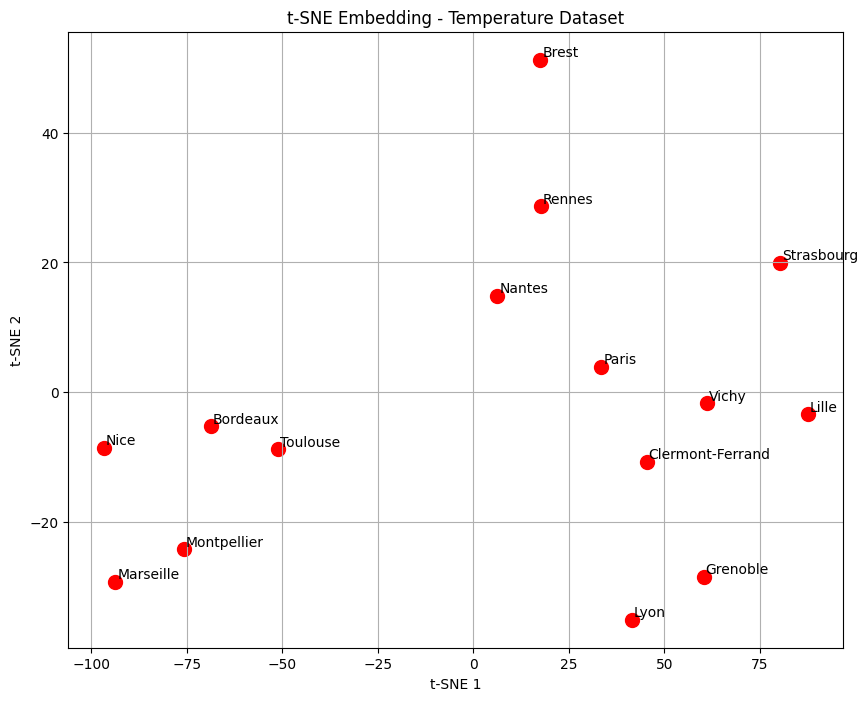

In [190]:
tsne_temp = TSNE(n_components=2, random_state=42, perplexity=5)
temp_embedded = tsne_temp.fit_transform(x1)

plt.figure(figsize=(10, 8))
plt.scatter(temp_embedded[:, 0], temp_embedded[:, 1], c='red', s=100)
for i, ville in enumerate(villes):
    plt.text(temp_embedded[i, 0] + 0.5, temp_embedded[i, 1] + 0.5, ville)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Embedding - Temperature Dataset')
plt.grid(True)
plt.show()



With this methods, we can affirm that Brest is an outllier. Strasbourg also seems to be out of the group.



For the clusters :

- Southern cities (Nice, Marseille, Montpellier, Toulouse, Bordeaux) cluster together
- Northern/central cities form another distinct group

The embedding reveals climate similarities better than pure geographical proximity because for exemple : Lille is nearest than Vichy from Paris



**Question3**

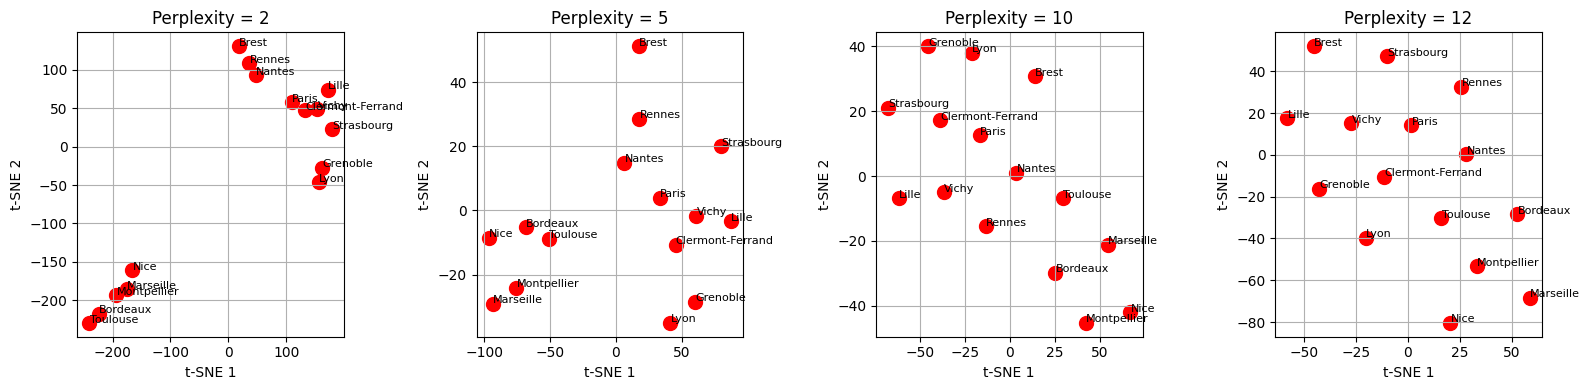

In [191]:
perplexities = [2, 5, 10, 12]

plt.figure(figsize=(16, 4))
for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    embedded = tsne.fit_transform(x1)
    
    plt.subplot(1, 4, i+1)
    plt.scatter(embedded[:, 0], embedded[:, 1], c='red', s=100)
    for j, ville in enumerate(villes):
        plt.text(embedded[j, 0] + 0.2, embedded[j, 1] + 0.2, ville, fontsize=8)
    plt.title(f'Perplexity = {perp}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
plt.tight_layout()
plt.show()

Perplexity parameters:

-When the perplexity is low(2):

The cities of a same group are all close from each other. We can't identify the outliers
  


-When the perplexity is Medium(5):

It provides a balanced view of both local and global structures, is well-suited for our dataset size of 15 cities, and effectively preserves cluster structure while allowing for outlier detection.

-High Perplexity (10-12):
Neither clusters nor outliers can be clearly identified


We can notice that the perplexity number can not be greater thant the number of features.



The perplexity does not take account of the geographical position in terms of projection. But the clusters are coherent in terms of geography.

**Digits.npz**

**Question 1/2**

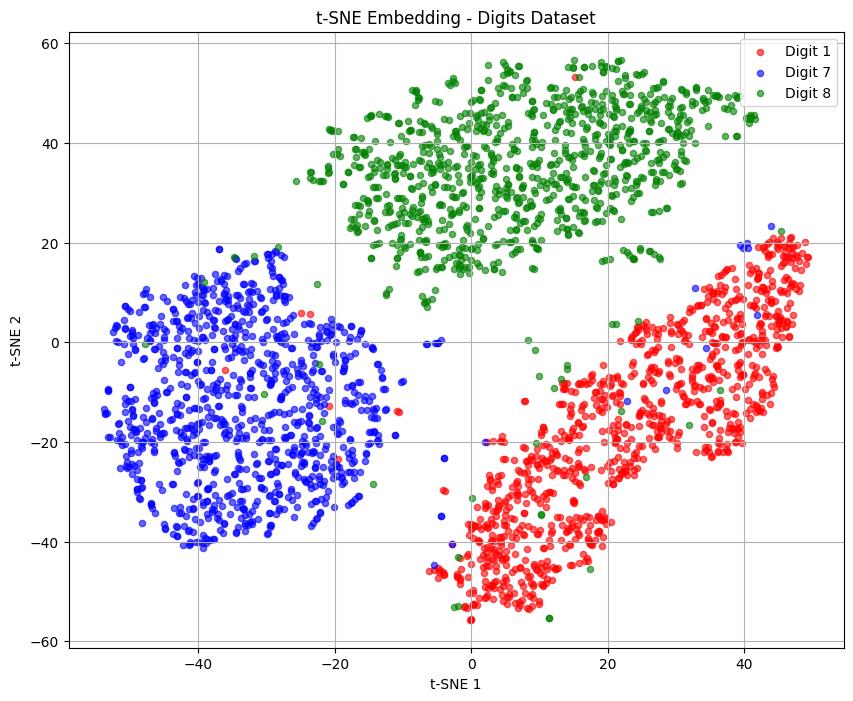

In [192]:
tsne_digits = TSNE(n_components=2, random_state=42, perplexity=30)
digits_embedded = tsne_digits.fit_transform(x2)

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
unique_classes = np.unique(y.flatten())

for i, digit_class in enumerate(unique_classes):
    mask = (y.flatten() == digit_class)
    plt.scatter(digits_embedded[mask, 0], digits_embedded[mask, 1], 
               c=colors[i], alpha=0.6, s=20, label=f'Digit {digit_class}')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Embedding - Digits Dataset')
plt.legend()
plt.grid(True)
plt.show()

We notice that the  clusters are well separated. to me, It is the most efficient techniques for this dataset that we've seen in this lab

**Question 3**

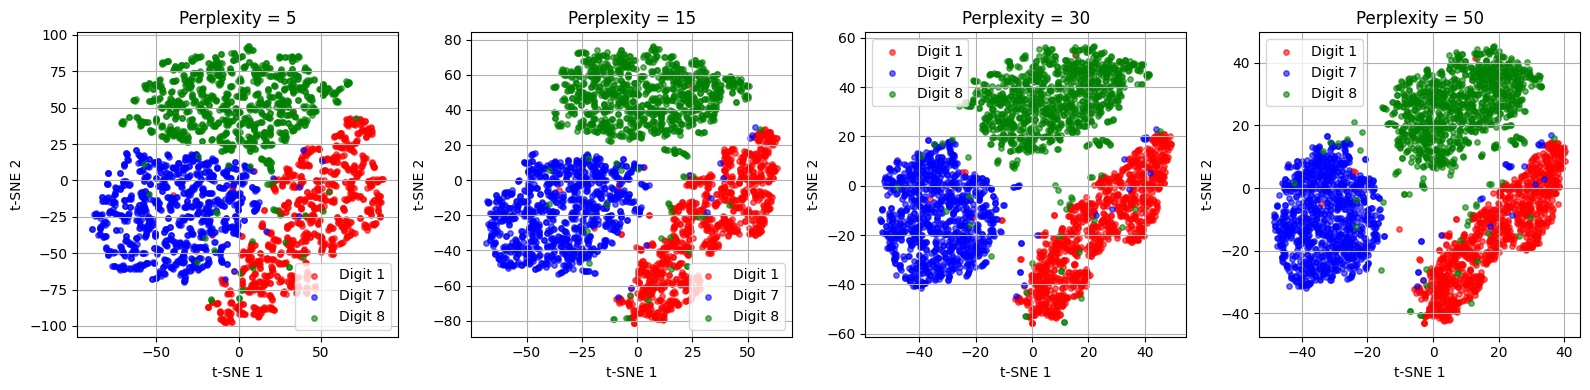

In [193]:
perplexities = [5, 15, 30, 50]

plt.figure(figsize=(16, 4))
for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    embedded = tsne.fit_transform(x2)
    
    plt.subplot(1, 4, i+1)
    for j, digit_class in enumerate(unique_classes):
        mask = (y.flatten() == digit_class)
        plt.scatter(embedded[mask, 0], embedded[mask, 1], 
                   c=colors[j], alpha=0.6, s=15, label=f'Digit {digit_class}')
    plt.title(f'Perplexity = {perp}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

More the perplexity increase, more the clusters are well separated and compact.

**Comparison of t-SNE and PCA for Digits Visualization**

In [194]:
pca_silhouette = silhouette_score(digits_projected, y.ravel())
tsne_silhouette = silhouette_score(digits_embedded, y.ravel())

print(f"PCA Silhouette Score: {pca_silhouette:.3f}")
print(f"t-SNE Silhouette Score: {tsne_silhouette:.3f}")


pca_db = davies_bouldin_score(digits_projected, y.ravel())
tsne_db = davies_bouldin_score(digits_embedded, y.ravel())

print(f"PCA Davies-Bouldin: {pca_db:.3f}")
print(f"t-SNE Davies-Bouldin: {tsne_db:.3f}")

PCA Silhouette Score: 0.429
t-SNE Silhouette Score: 0.491
PCA Davies-Bouldin: 0.812
t-SNE Davies-Bouldin: 0.752


The doc of the metric of Davies Bouldin : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

When visualizing high-dimensional data like handwritten digits (28×28 pixels = 784 features), dimensionality reduction is essential. Two common methods are PCA (linear) and t-SNE (non-linear). 

1. Cluster Separation

t-SNE creates clearly separated clusters for each digit, making it easy to distinguish classes.

PCA shows more overlap, especially between digits 1 and 7 (because it's linear).

t-SNE preserves local neighborhoods better, keeping similar digits close together.

2. t-SNE vs. PCA

t-SNE captures complex, non-linear relationships in digit shapes.

PCA is limited to linear projections and can miss curved features, which is particularly important for digits like 8 with loops. But here, as we plot the 2000 th digit, it's ok.


The results show that t-SNE performs better than PCA in terms of clustering quality. The higher Silhouette score (0.491 vs 0.429) indicates that t-SNE creates more distinct and well-separated clusters. Similarly, the lower Davies-Bouldin index (0.752 vs 0.812) confirms that the clusters formed by t-SNE are more compact and better defined than those produced by PCA.

One main difference is that with t-SNE, we can’t rebuild the original digits, so we lose the visual meaning of the new dataset.

**Conclusion :**

After studying all these methods, we can conclude that dimensionality reduction techniques like PCA and t-SNE are particularly useful for larger datasets, as they help reduce storage requirements and computational cost.

Furthermore, clustering methods such as K-Means and GMM are also valuable:

K-Means is simple and efficient, making it a good first approach to explore and visualize the structure of the data.

GMM provides more flexibility and is especially useful for detecting outliers or modeling clusters with different shapes and variances.

Overall, combining dimensionality reduction with clustering can provide both insights into data structure and practical advantages for handling large or complex datasets.

